<a href="https://colab.research.google.com/github/hyungchanchoi/AlgorithmTrading_pykiwoom/blob/main/data%20analysis/kodex_tiger_active_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
cd drive/My Drive/algorithmtrading/pair_trading/Datas

/content/drive/My Drive/algorithmtrading/pair_trading/Datas


In [2]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

# - 과거 1분단위 데이터 받아오기

In [3]:
now = '20210113'

kodex_active = pd.read_pickle('KODEX 혁신기술테마액티브(m)_'+now)
tiger_active = pd.read_pickle('TIGER AI코리아그로스액티브(m)_'+now)

temp =  pd.merge(left = kodex_active , right = tiger_active, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex_active','volume','tiger_active','volume']
temp = temp[['kodex_active','tiger_active']]

temp['kodex_active']=pd.to_numeric(temp['kodex_active'])
temp['tiger_active']=pd.to_numeric(temp['tiger_active'])

for i in range(len(temp)):
    if temp['kodex_active'].iloc[i] < 0:
        temp['kodex_active'].iloc[i] = -temp['kodex_active'].iloc[i]
    if temp['tiger_active'].iloc[i] < 0:
        temp['tiger_active'].iloc[i] = -temp['tiger_active'].iloc[i]


temp['tiger_active'] = temp['tiger_active']
temp['spread'] = temp['kodex_active'] - temp['tiger_active']
temp['kodex_active_cumret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])
temp['tiger_active_cumret'] = np.log(temp['tiger_active']/temp['tiger_active'][0])
temp['ma10_spread'] = temp['spread'].rolling(window=10, center=False).mean()

temp

kodex_active  tiger_active  spread  kodex_active_cumret  \
체결시간                                                                      
20200929090000         10040         10100     -60             0.000000   
20200929090100         10020         10100     -80            -0.001994   
20200929090200         10015         10100     -85            -0.002493   
20200929090300         10005         10100     -95            -0.003492   
20200929090400         10000         10100    -100            -0.003992   
...                      ...           ...     ...                  ...   
20210113151200         13670         13655      15             0.308627   
20210113151300         13675         13665      10             0.308992   
20210113151400         13680         13665      15             0.309358   
20210113151500         13655         13680     -25             0.307529   
20210113153000         13705         13740     -35             0.311184   

                tiger_active_cumret  ma10_spread  
체결시간                                              
20200929090000             0.000000          nan  
20200929090100             0.000000          nan  
20200929090200             0.000000          nan  
20200929090300             0.000000          nan  
20200929090400             0.000000          nan  
...                             ...          ...  
20210113151200             0.301570     2.000000  
20210113151300             0.302302     4.000000  
20210113151400             0.302302     6.000000  
20210113151500             0.303399     3.500000  
20210113153000             0.307776     1.500000  

[3309 rows x 6 columns]

In [7]:
x = coint(temp['kodex_active'][-500:],temp['tiger_active'][-500:])
x

(-4.424189382317229,
 0.0016270908918811428,
 array([-3.91852234, -3.34840209, -3.05296032]))

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [4]:
df = {}
calender = []
for date in range(20200929,20210109):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temps['kodex_active_dayret'] = np.log(temps['kodex_active']/temps['kodex_active'][0])
        temps['tiger_active_dayret'] = np.log(temps['tiger_active']/temps['tiger_active'][0])
        temps['spread_cumret'] = temps['kodex_active_cumret'] -temps['tiger_active_cumret']
        temps['spread_dayret']= temps['kodex_active_dayret'] - temps['tiger_active_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

20200930 는 공휴일 입니다.
20200931 는 공휴일 입니다.
20200932 는 공휴일 입니다.
20200933 는 공휴일 입니다.
20200934 는 공휴일 입니다.
20200935 는 공휴일 입니다.
20200936 는 공휴일 입니다.
20200937 는 공휴일 입니다.
20200938 는 공휴일 입니다.
20200939 는 공휴일 입니다.
20200940 는 공휴일 입니다.
20200941 는 공휴일 입니다.
20200942 는 공휴일 입니다.
20200943 는 공휴일 입니다.
20200944 는 공휴일 입니다.
20200945 는 공휴일 입니다.
20200946 는 공휴일 입니다.
20200947 는 공휴일 입니다.
20200948 는 공휴일 입니다.
20200949 는 공휴일 입니다.
20200950 는 공휴일 입니다.
20200951 는 공휴일 입니다.
20200952 는 공휴일 입니다.
20200953 는 공휴일 입니다.
20200954 는 공휴일 입니다.
20200955 는 공휴일 입니다.
20200956 는 공휴일 입니다.
20200957 는 공휴일 입니다.
20200958 는 공휴일 입니다.
20200959 는 공휴일 입니다.
20200960 는 공휴일 입니다.
20200961 는 공휴일 입니다.
20200962 는 공휴일 입니다.
20200963 는 공휴일 입니다.
20200964 는 공휴일 입니다.
20200965 는 공휴일 입니다.
20200966 는 공휴일 입니다.
20200967 는 공휴일 입니다.
20200968 는 공휴일 입니다.
20200969 는 공휴일 입니다.
20200970 는 공휴일 입니다.
20200971 는 공휴일 입니다.
20200972 는 공휴일 입니다.
20200973 는 공휴일 입니다.
20200974 는 공휴일 입니다.
20200975 는 공휴일 입니다.
20200976 는 공휴일 입니다.
20200977 는 공휴일 입니다.
20200978 는 공휴일 입니다.
20200979 는 공휴일 입니다.


['20201005',
 '20201006',
 '20201007',
 '20201008',
 '20201012',
 '20201013',
 '20201014',
 '20201015',
 '20201016',
 '20201019',
 '20201020',
 '20201021',
 '20201022',
 '20201023',
 '20201026',
 '20201027',
 '20201028',
 '20201029',
 '20201030',
 '20201102',
 '20201103',
 '20201104',
 '20201105',
 '20201106',
 '20201109',
 '20201110',
 '20201111',
 '20201112',
 '20201113',
 '20201116',
 '20201117',
 '20201118',
 '20201119',
 '20201120',
 '20201123',
 '20201124',
 '20201125',
 '20201126',
 '20201127',
 '20201130',
 '20201201',
 '20201202',
 '20201203',
 '20201204',
 '20201207',
 '20201208',
 '20201209',
 '20201210',
 '20201211',
 '20201214',
 '20201215',
 '20201216',
 '20201217',
 '20201218',
 '20201221',
 '20201222',
 '20201223',
 '20201224',
 '20201228',
 '20201229',
 '20201230',
 '20210104',
 '20210105',
 '20210106',
 '20210107',
 '20210108']

# 그래프 그리기

In [5]:
df['20210108']

kodex_active  tiger_active  spread  kodex_active_cumret  \
체결시간                                                                      
20210107153000         13230         13200      30             0.275910   
20210108090000         13330         13430    -100             0.283440   
20210108090100         13330         13395     -65             0.283440   
20210108090400         13355         13365     -10             0.285314   
20210108090600         13350         13390     -40             0.284939   
...                      ...           ...     ...                  ...   
20210108145900         13645         13620      25             0.306796   
20210108150000         13675         13620      55             0.308992   
20210108150200         13680         13660      20             0.309358   
20210108150700         13690         13665      25             0.310089   
20210108151300         13690         13740     -50             0.310089   

                tiger_active_cumret  ma10_spread  kodex_active_dayret  \
체결시간                                                                    
20210107153000             0.267681    50.000000             0.000000   
20210108090000             0.284956    39.000000             0.007530   
20210108090100             0.282346    25.500000             0.007530   
20210108090400             0.280104    16.500000             0.009404   
20210108090600             0.281973     6.000000             0.009029   
...                             ...          ...                  ...   
20210108145900             0.299004    51.000000             0.030886   
20210108150000             0.299004    53.000000             0.033082   
20210108150200             0.301936    47.500000             0.033448   
20210108150700             0.302302    43.500000             0.034179   
20210108151300             0.307776    31.500000             0.034179   

                tiger_active_dayret  spread_cumret  spread_dayret  
체결시간                                                               
20210107153000             0.000000       0.008228       0.000000  
20210108090000             0.017274      -0.001516      -0.009744  
20210108090100             0.014665       0.001094      -0.007135  
20210108090400             0.012423       0.005210      -0.003019  
20210108090600             0.014291       0.002967      -0.005262  
...                             ...            ...            ...  
20210108145900             0.031322       0.007792      -0.000436  
20210108150000             0.031322       0.009988       0.001760  
20210108150200             0.034255       0.007421      -0.000807  
20210108150700             0.034621       0.007786      -0.000442  
20210108151300             0.040094       0.002313      -0.005916  

[225 rows x 10 columns]

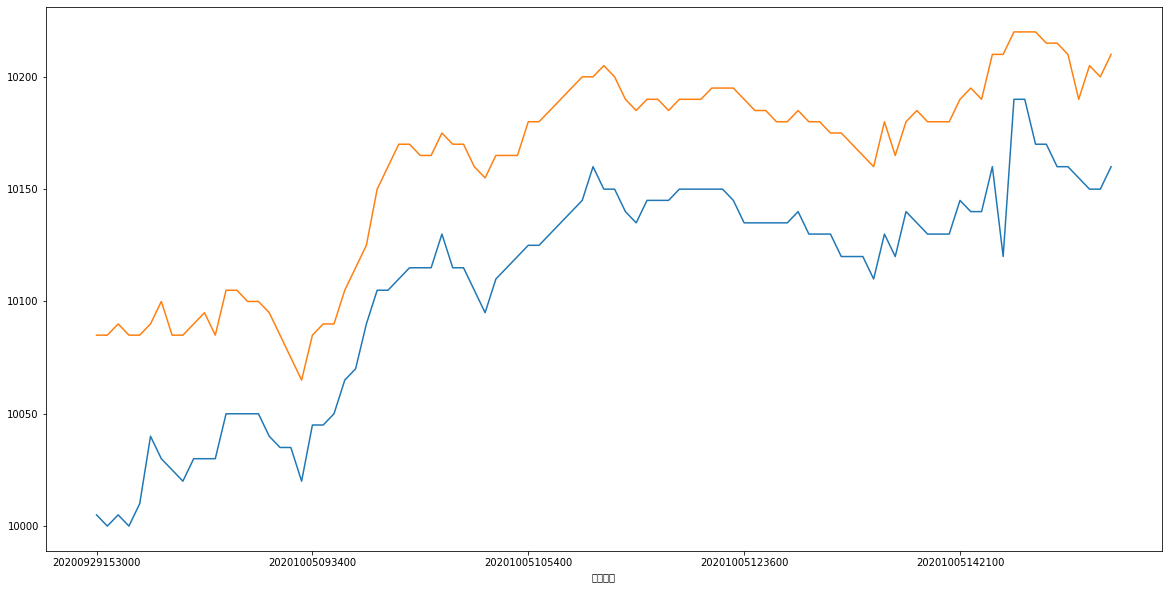

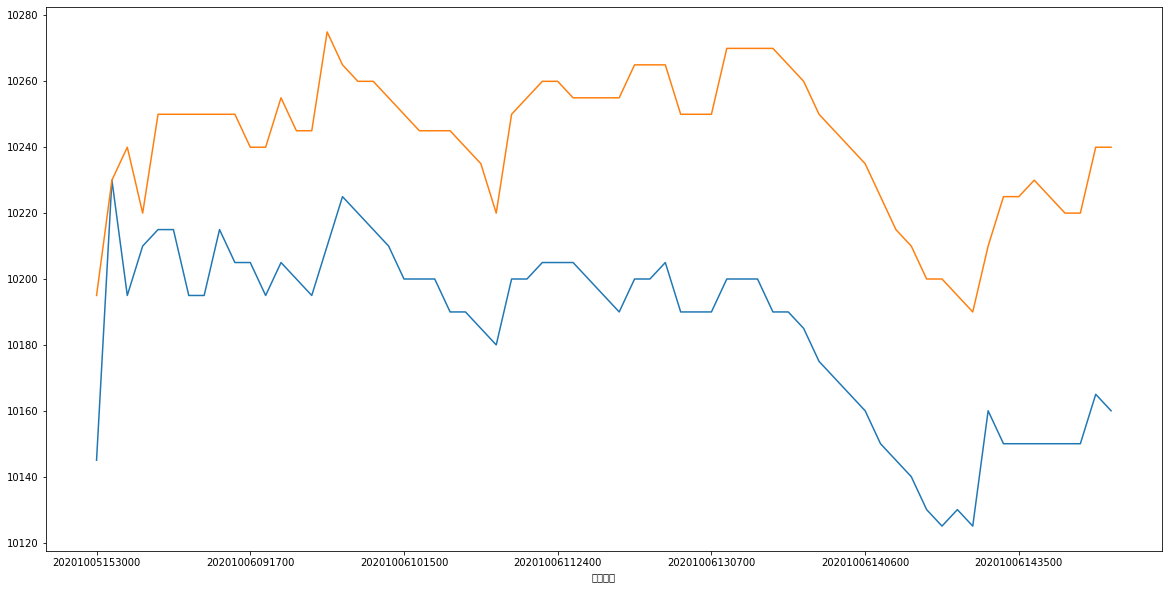

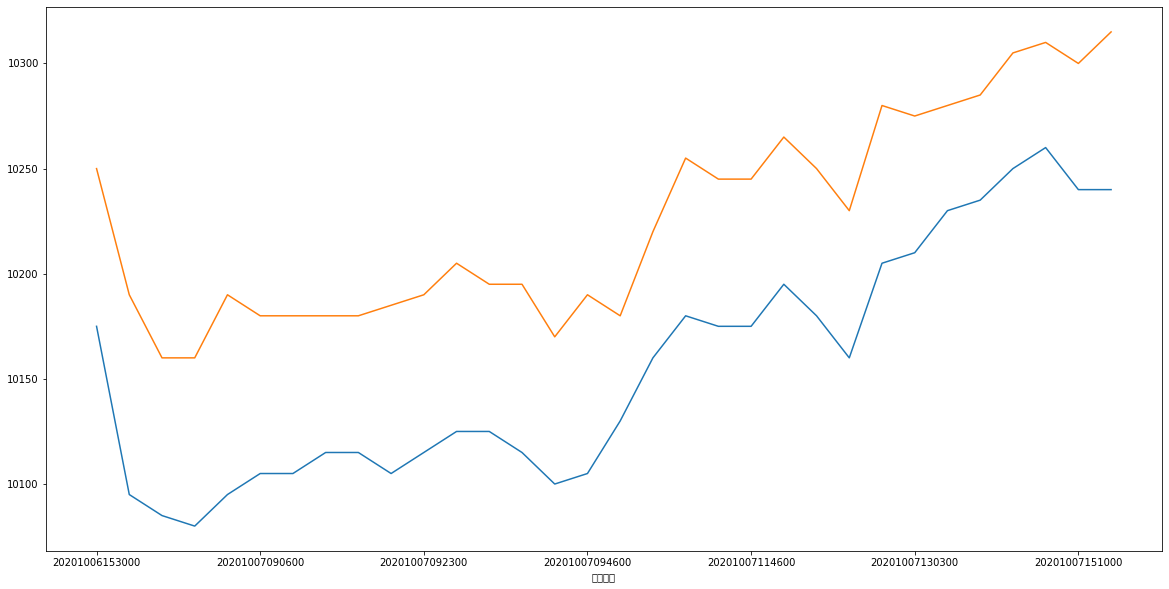

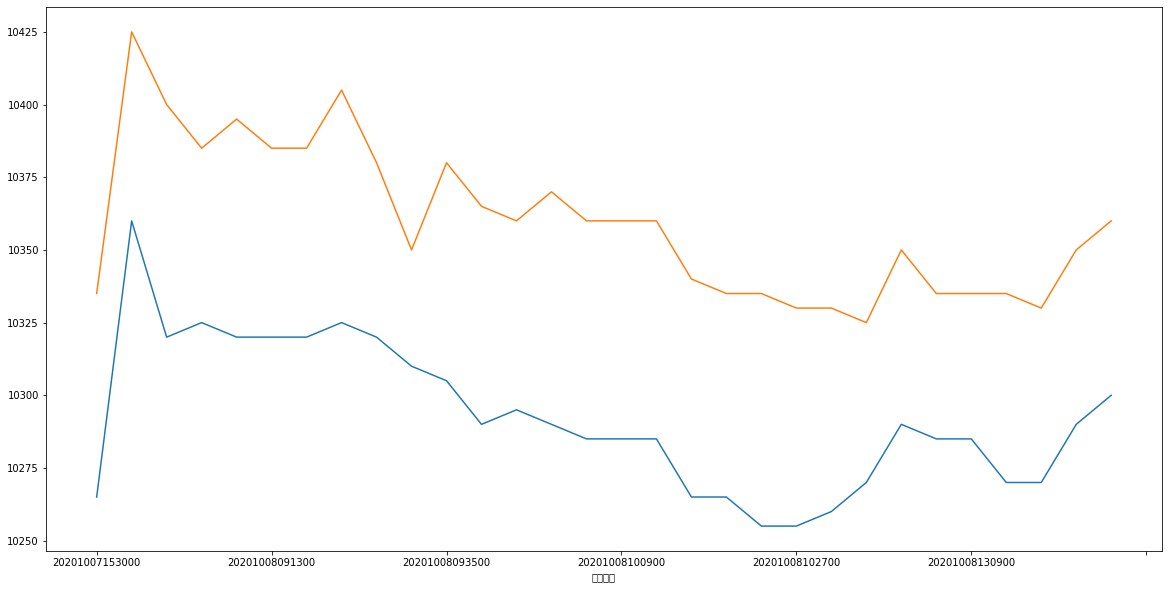

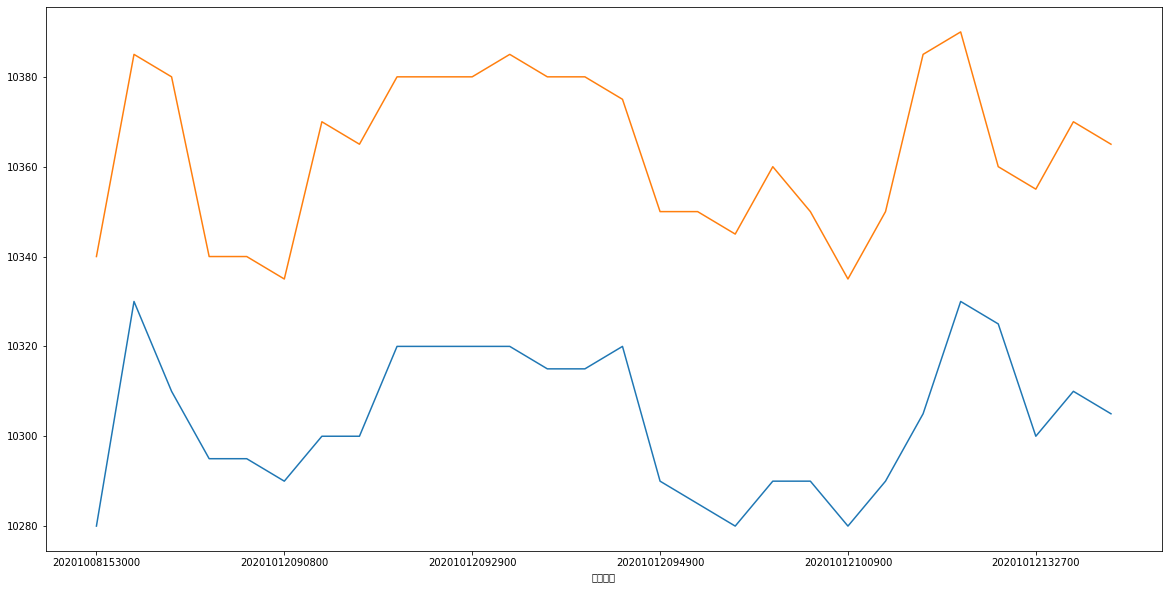

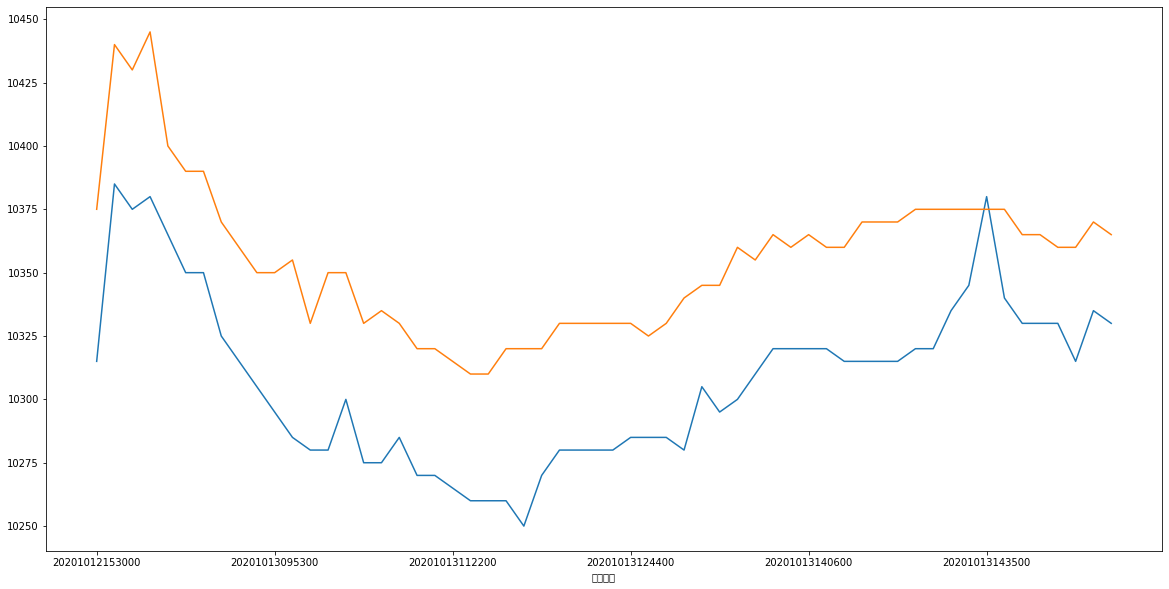

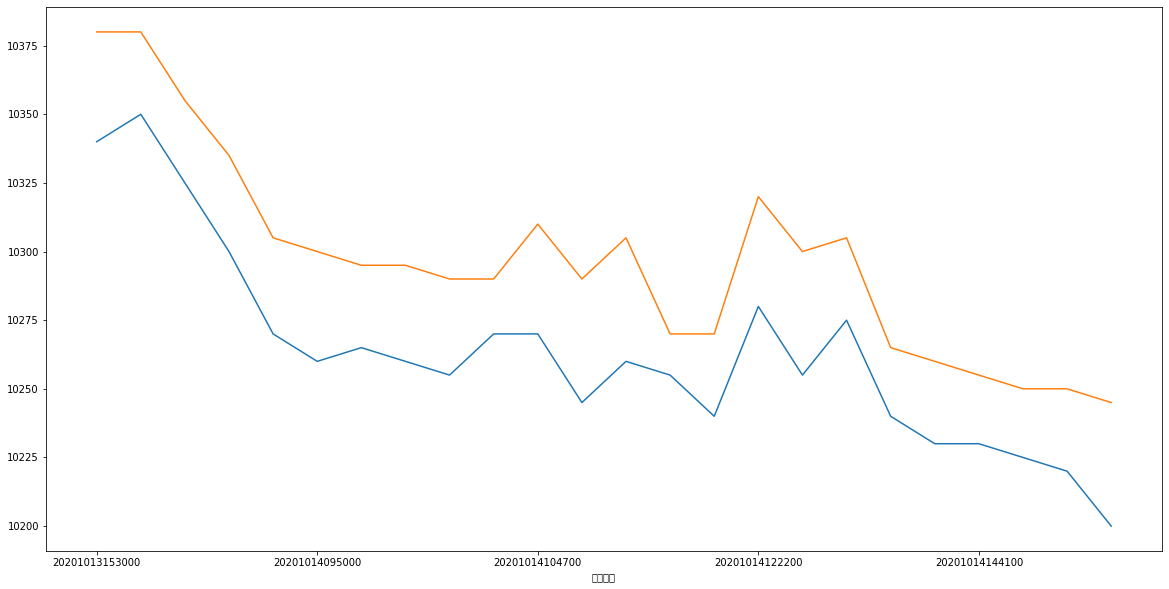

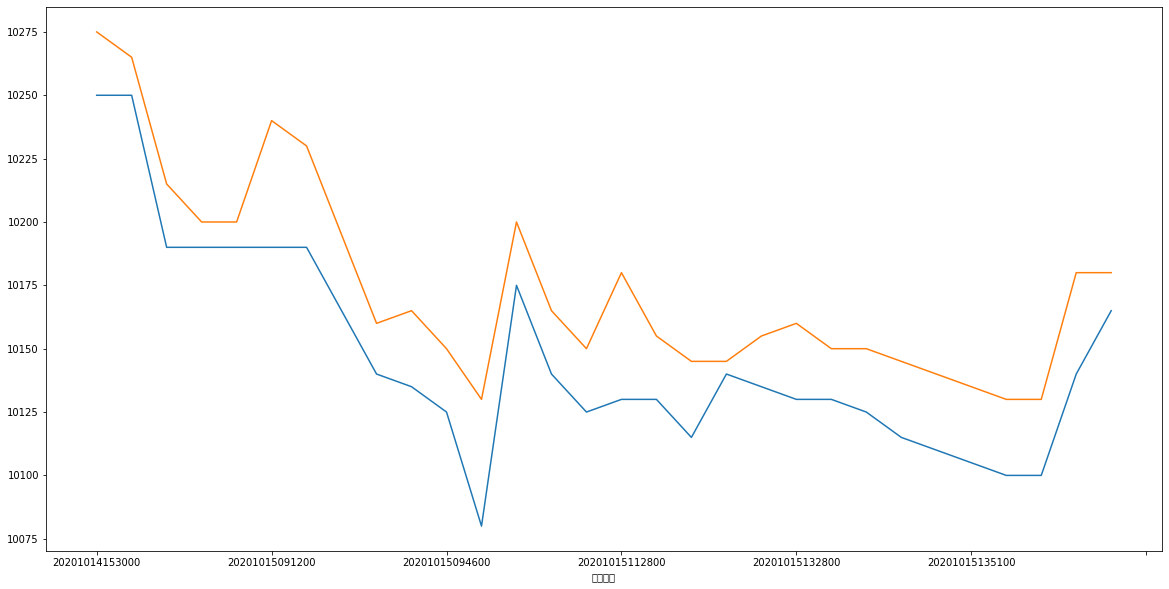

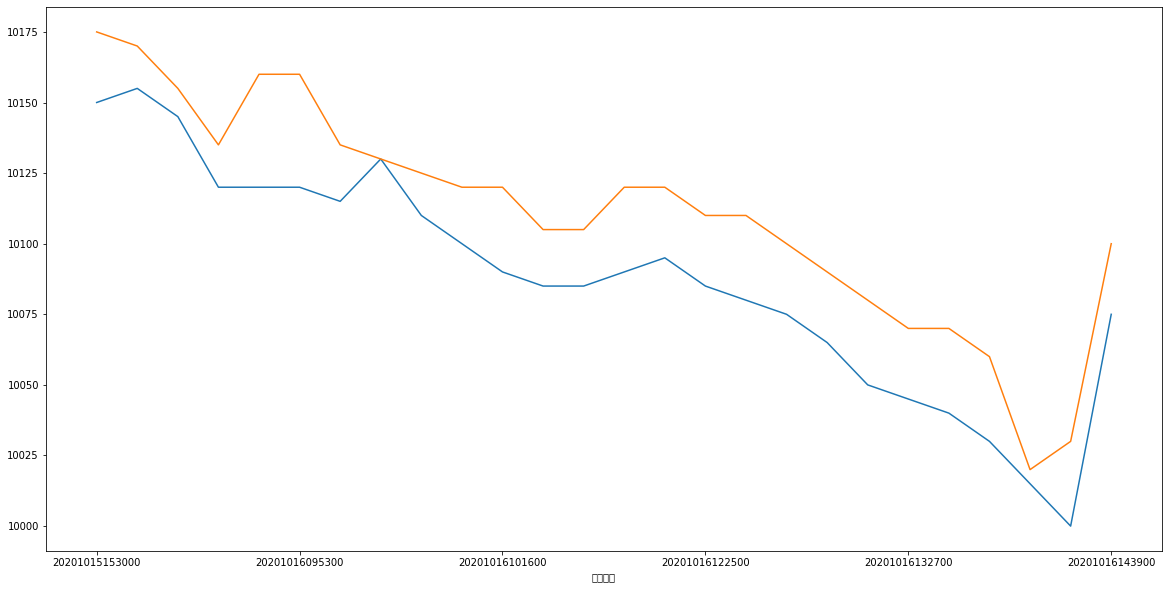

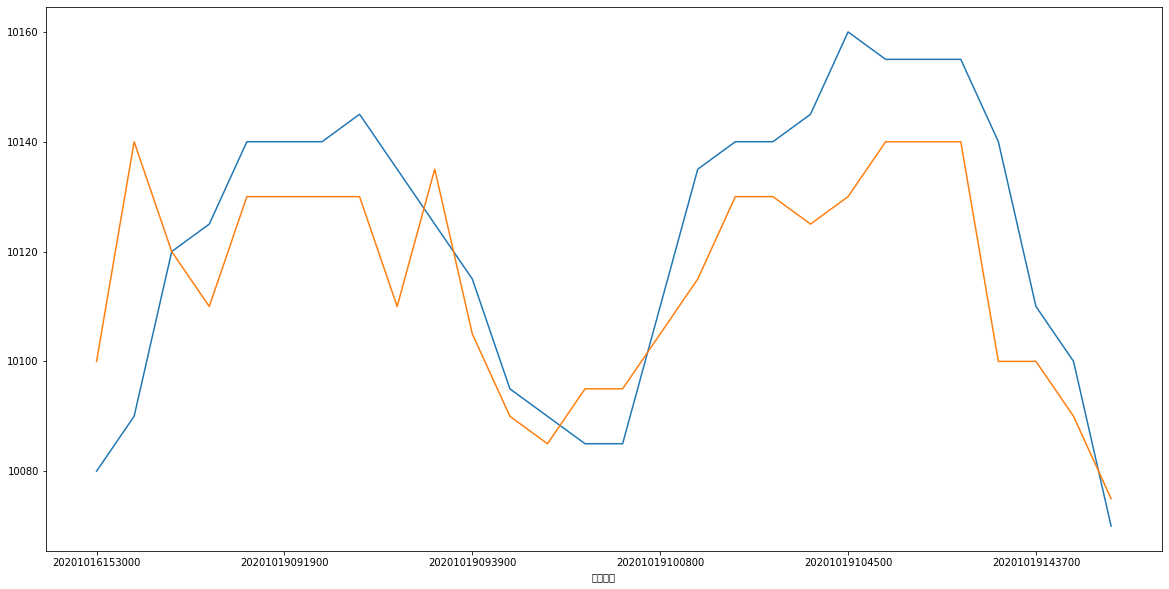

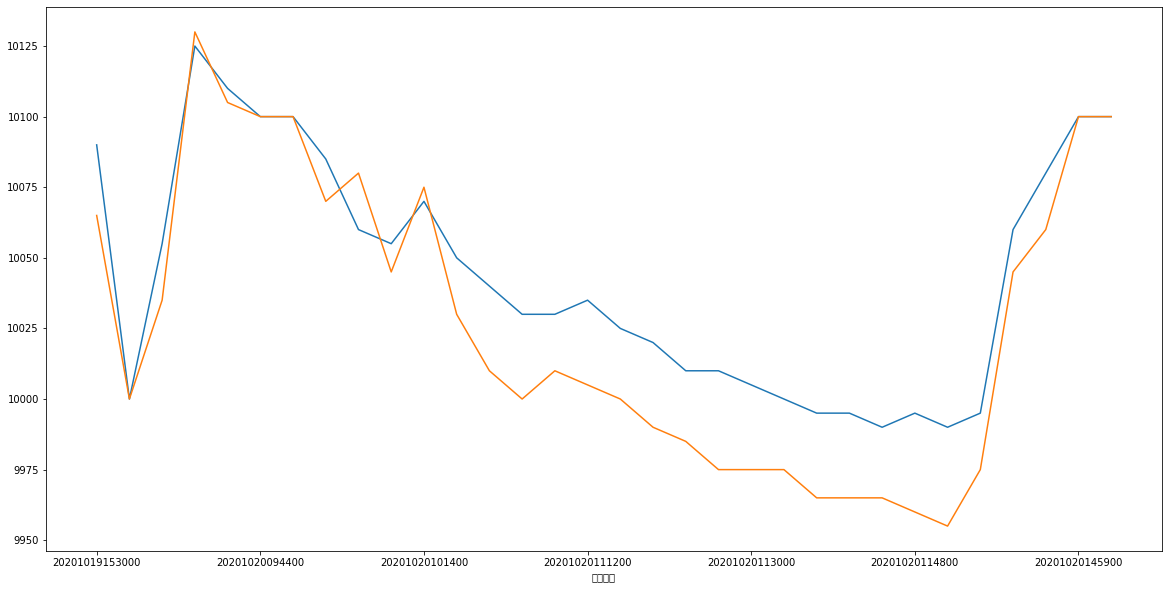

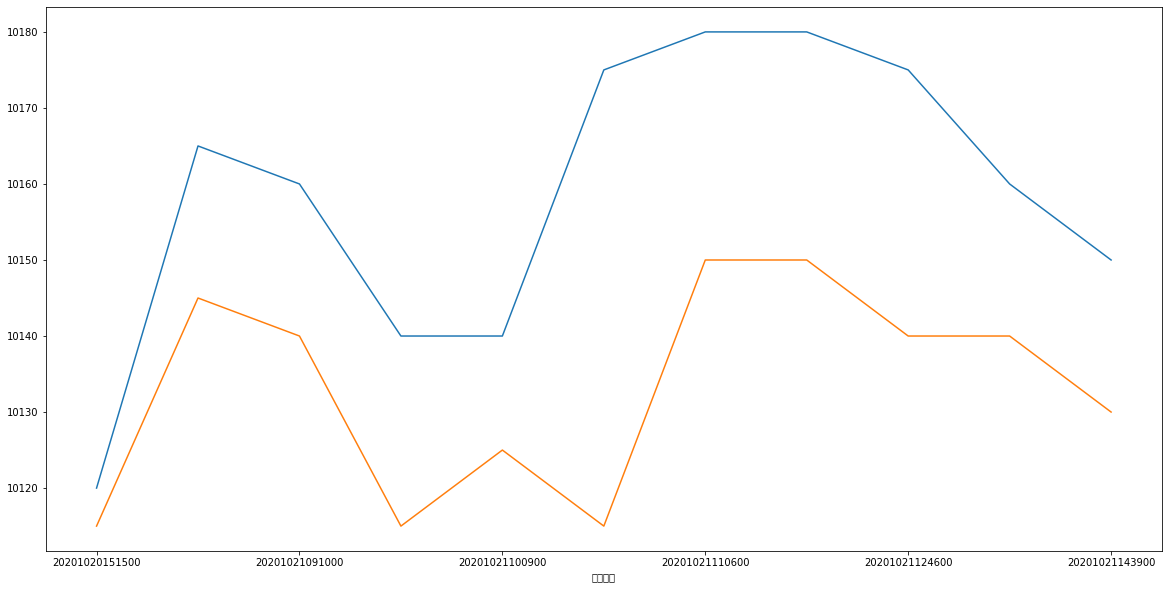

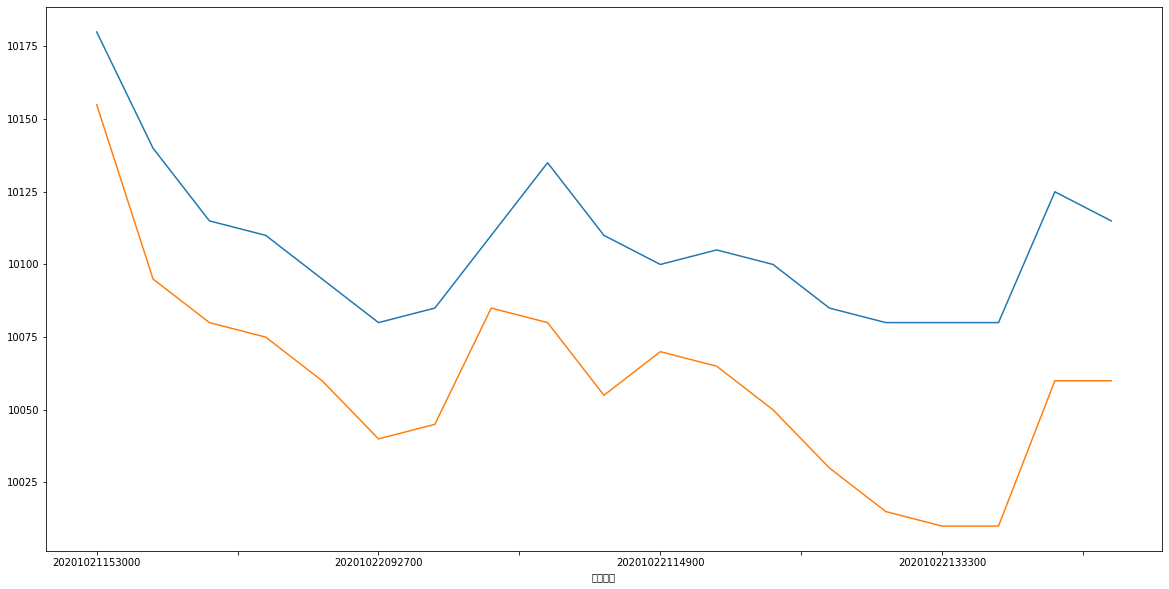

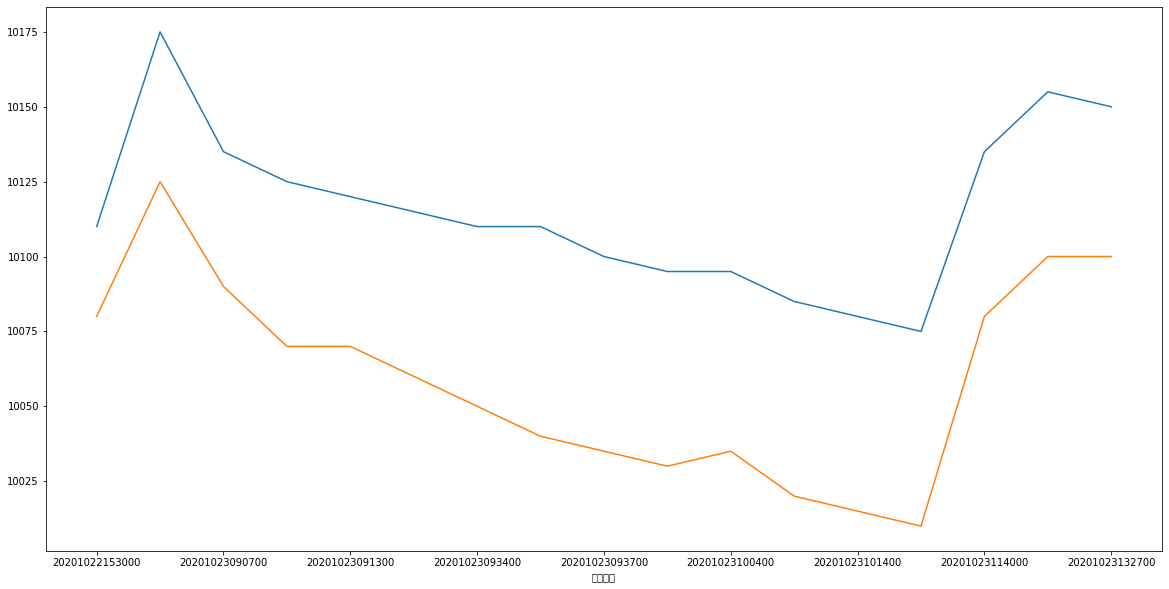

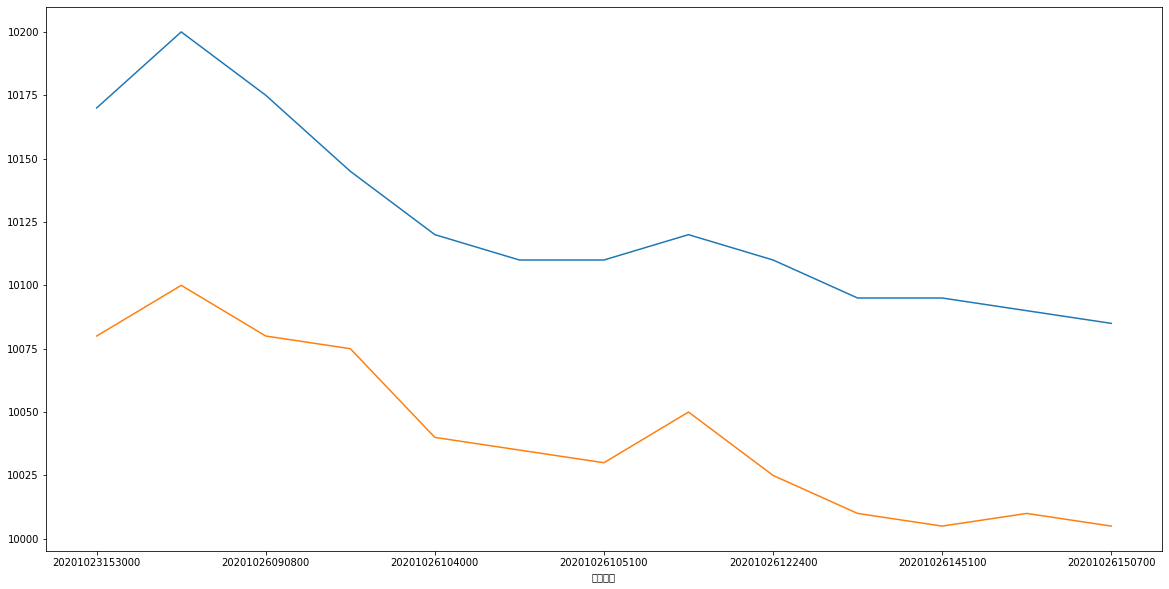

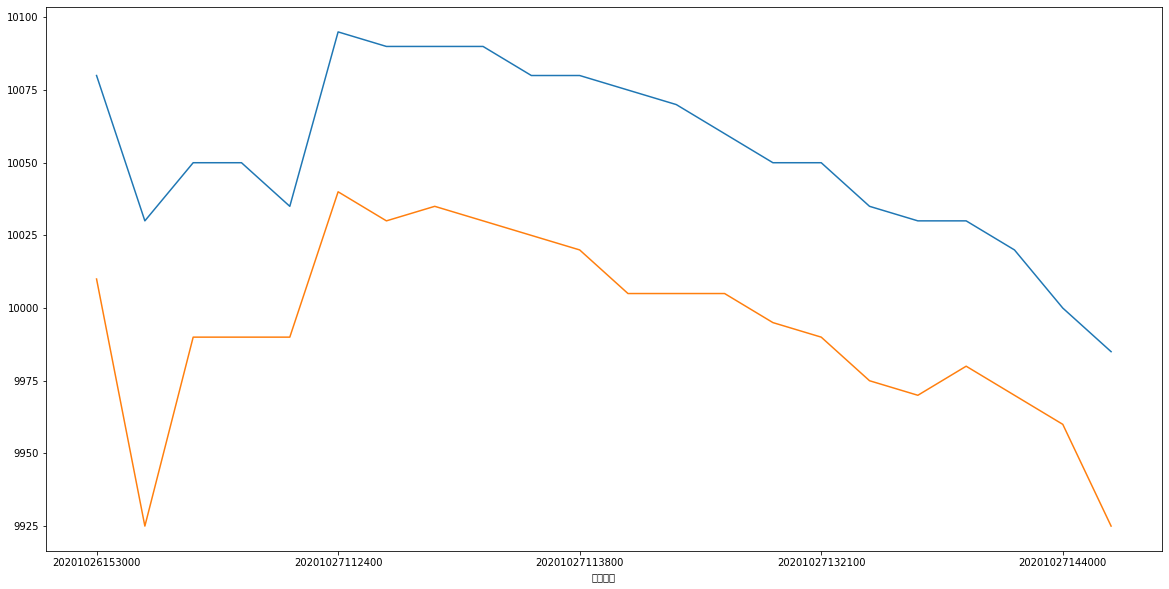

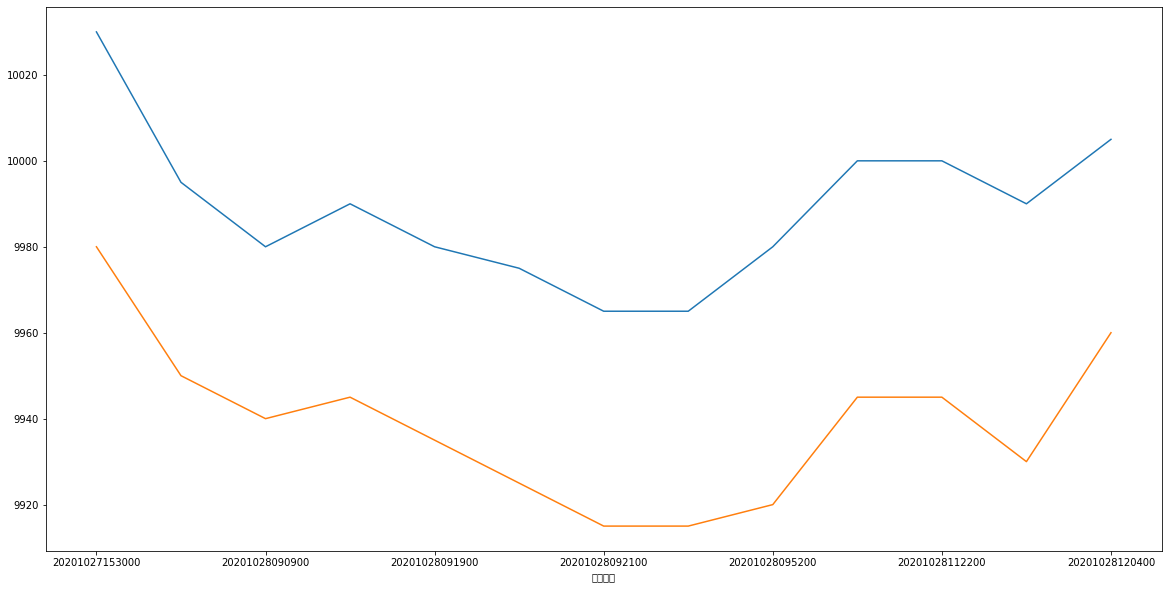

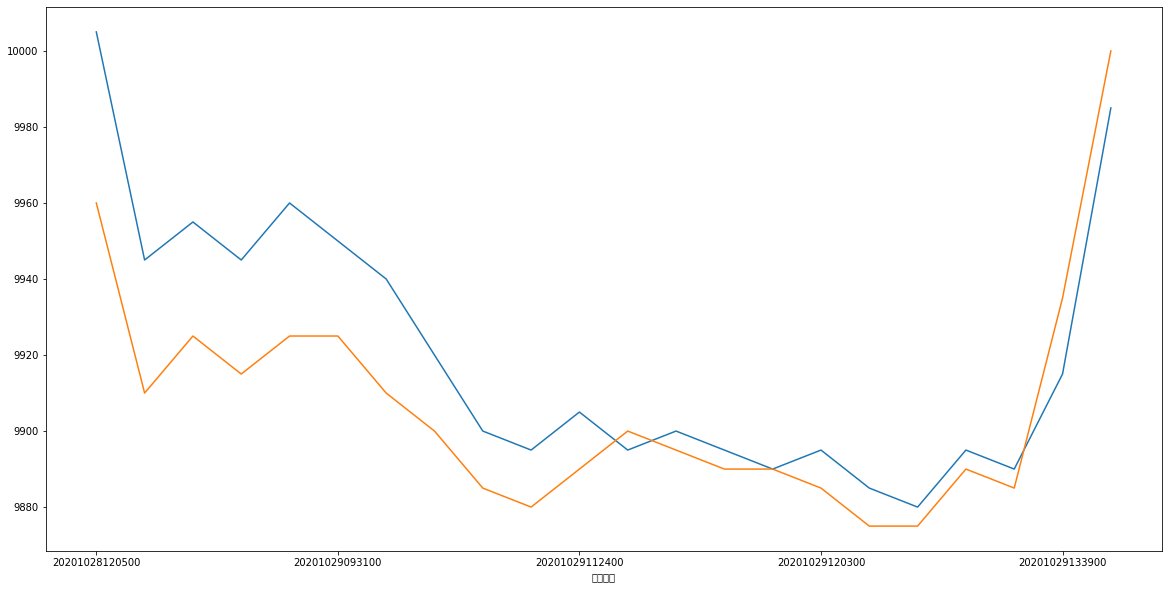

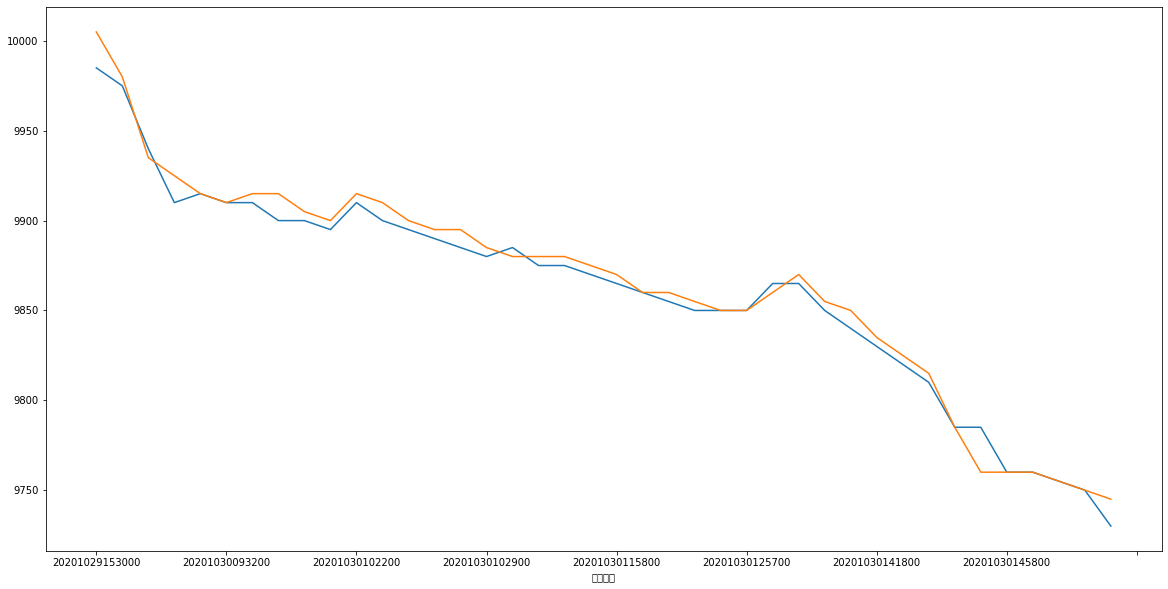

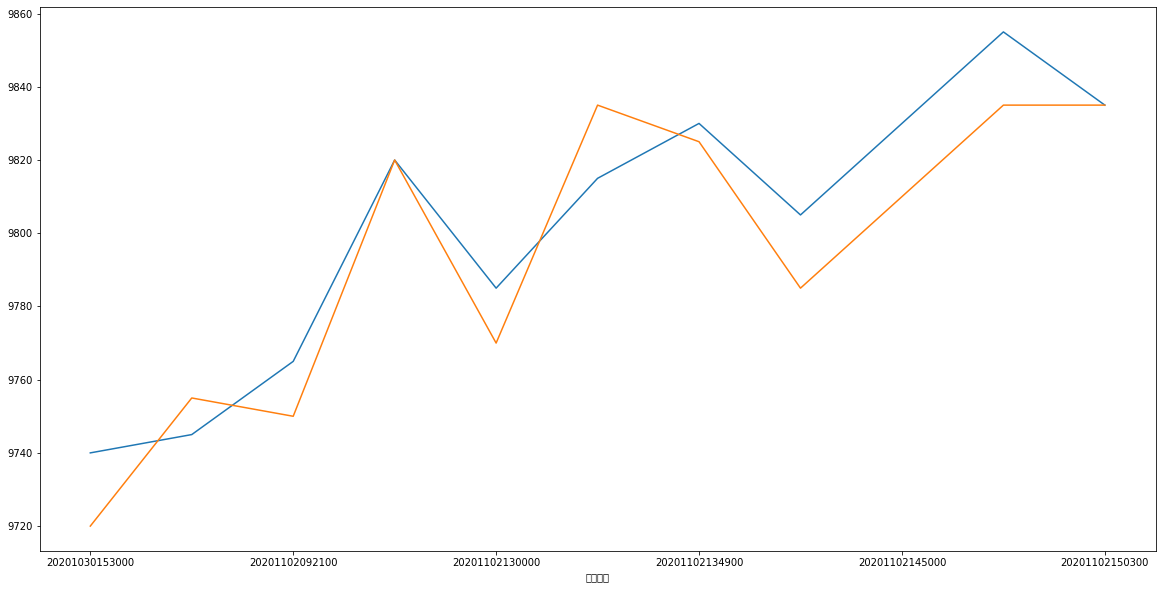

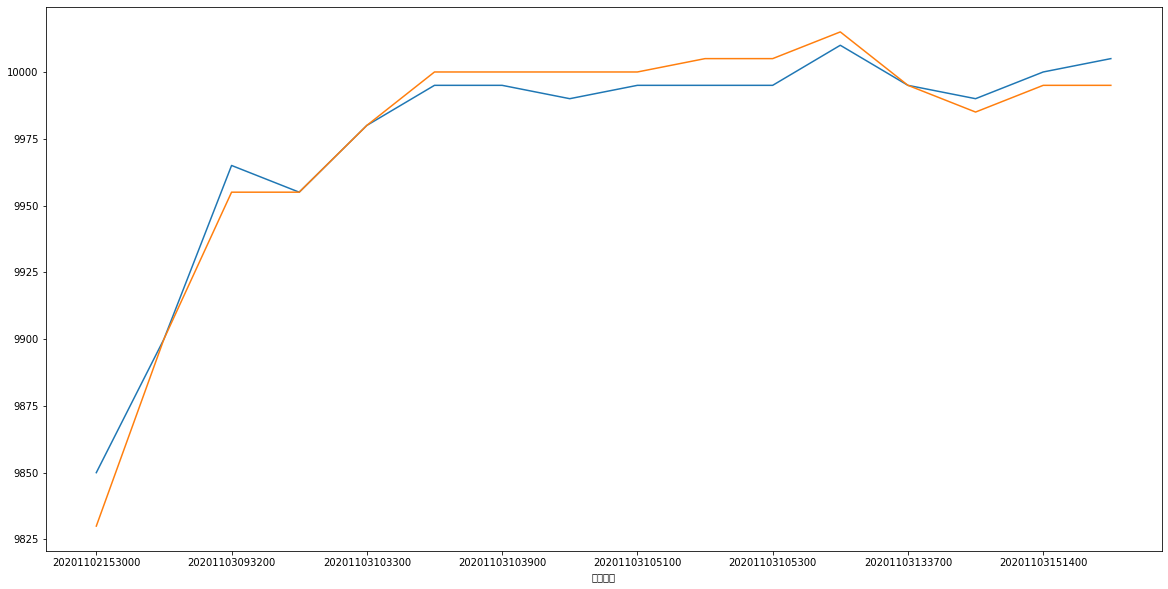

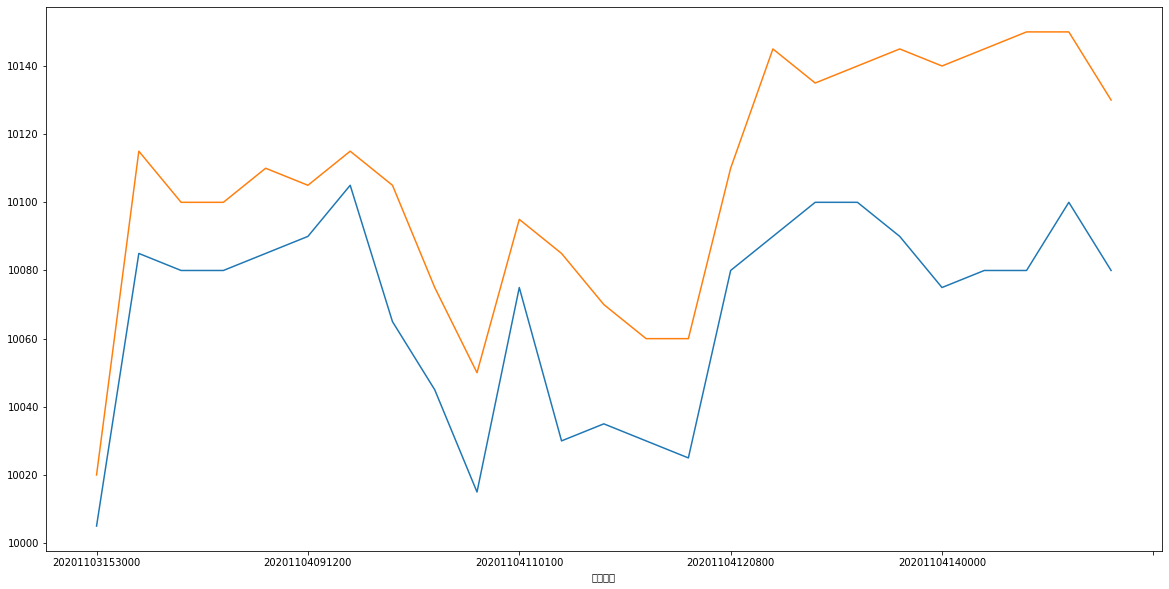

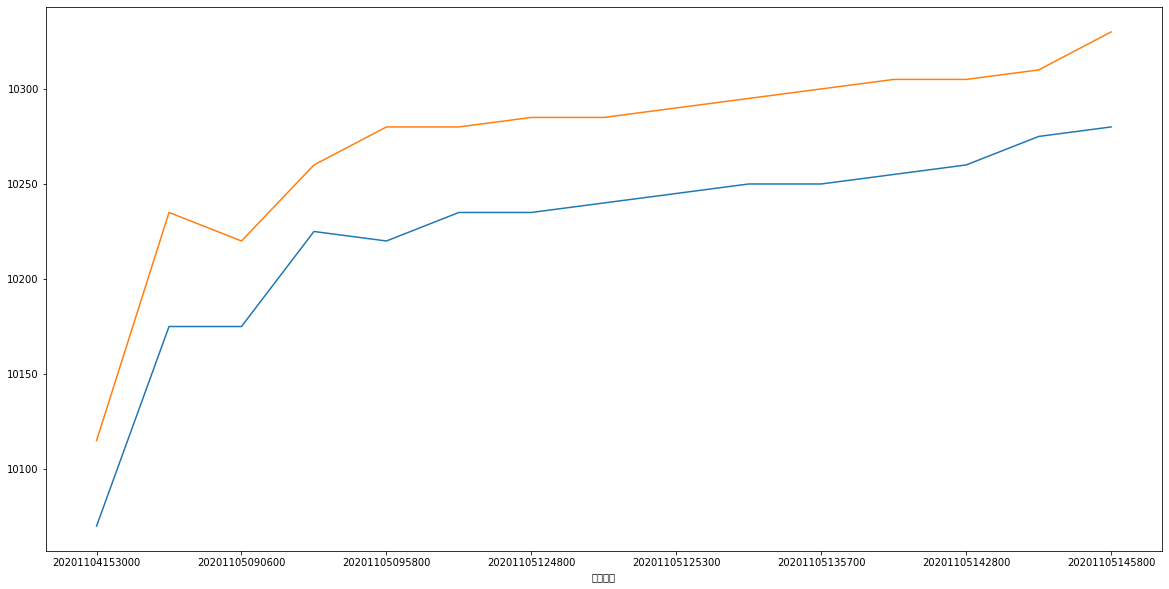

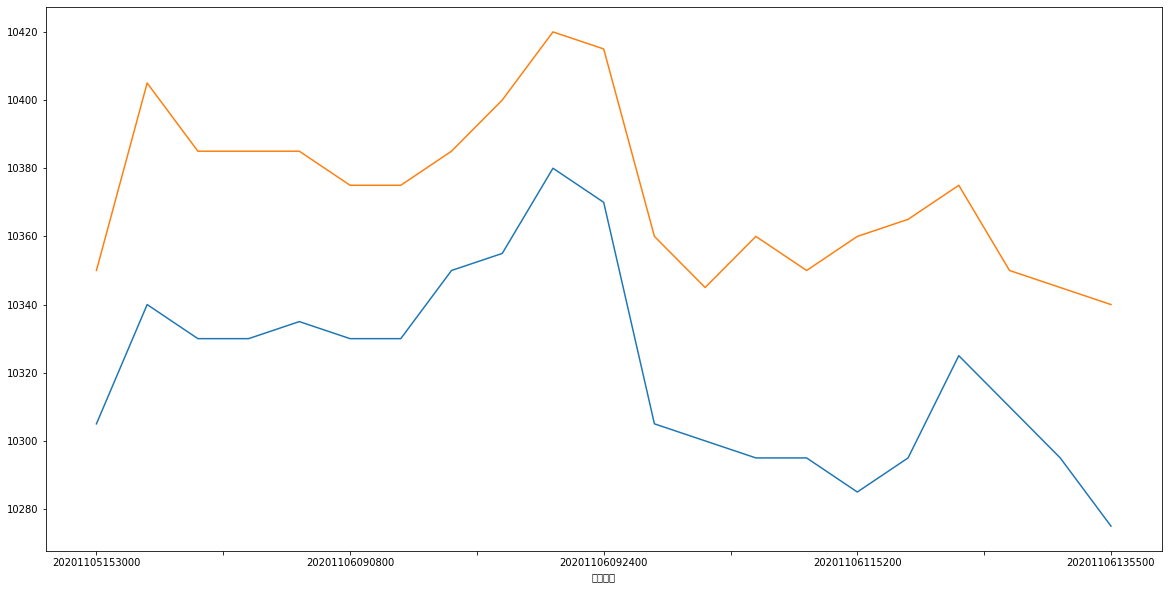

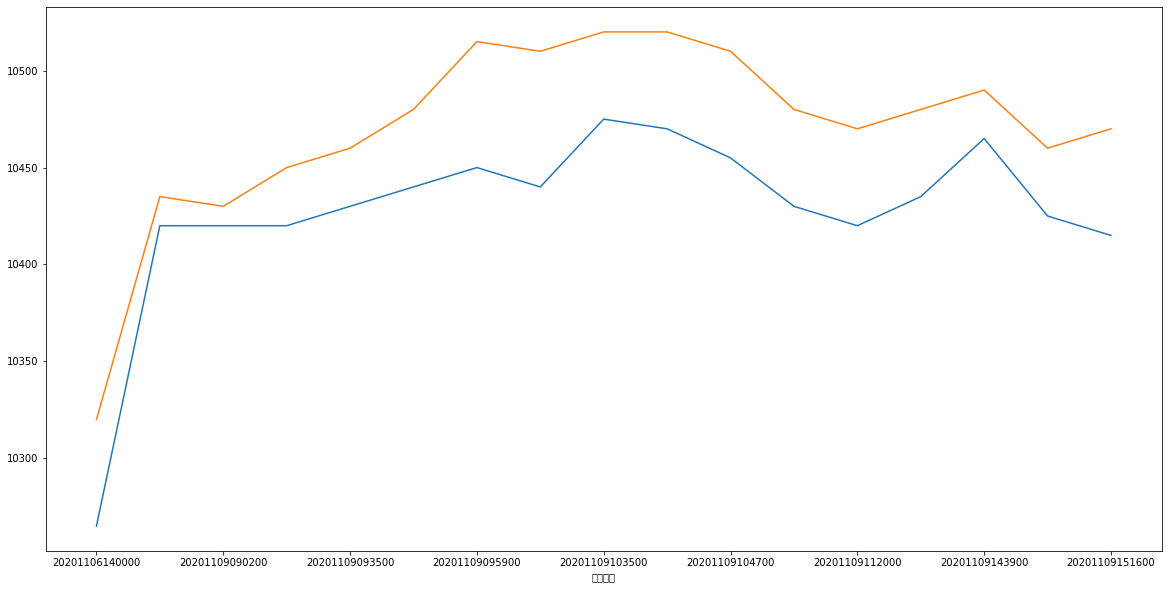

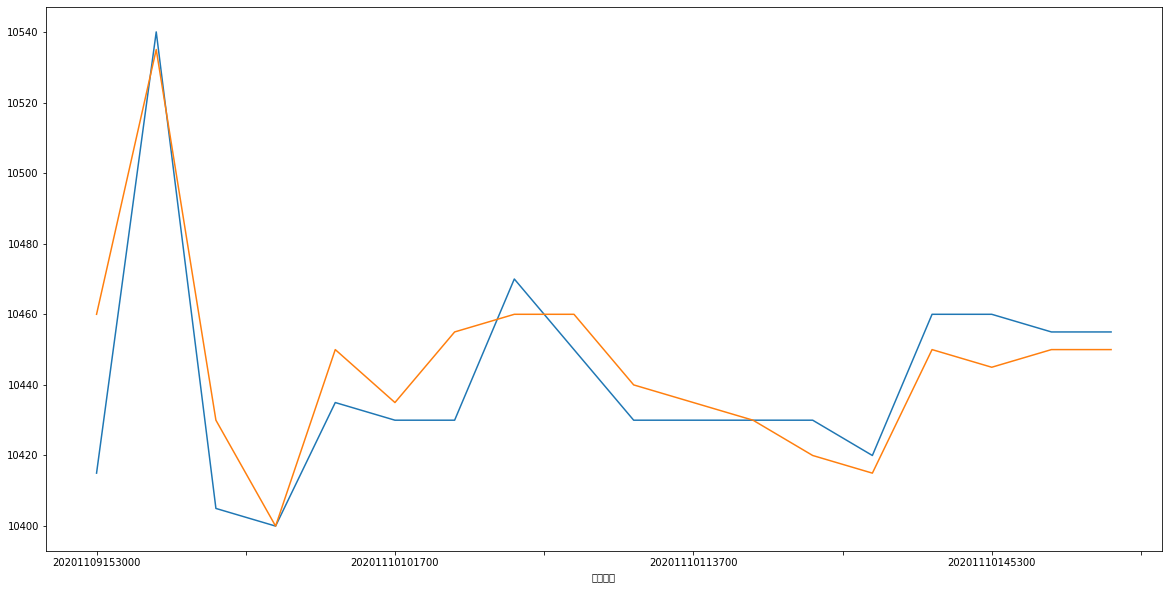

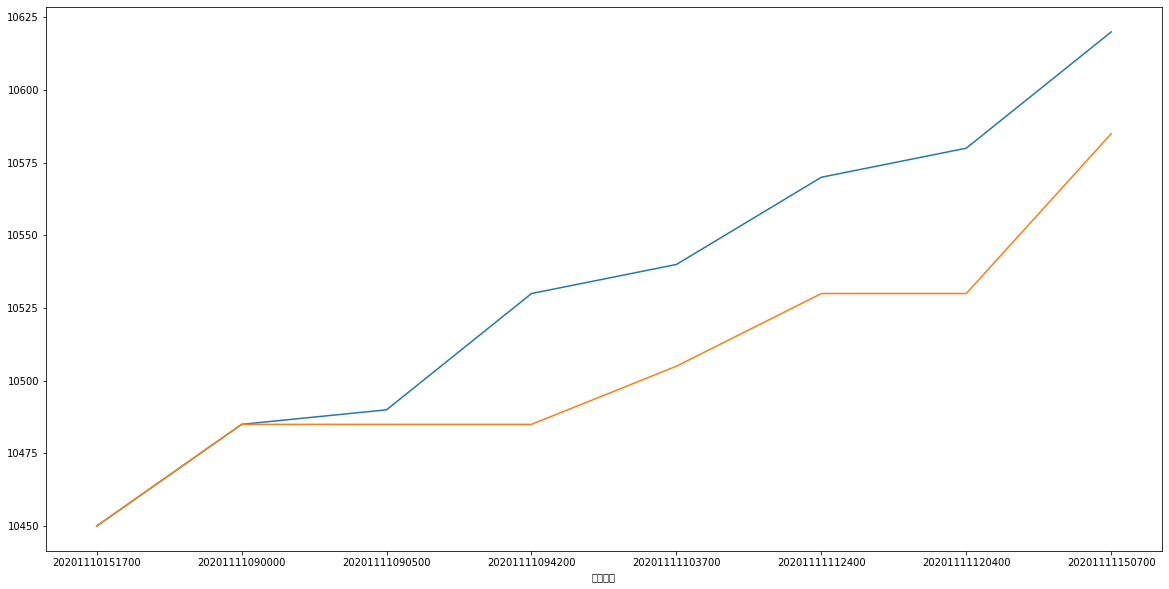

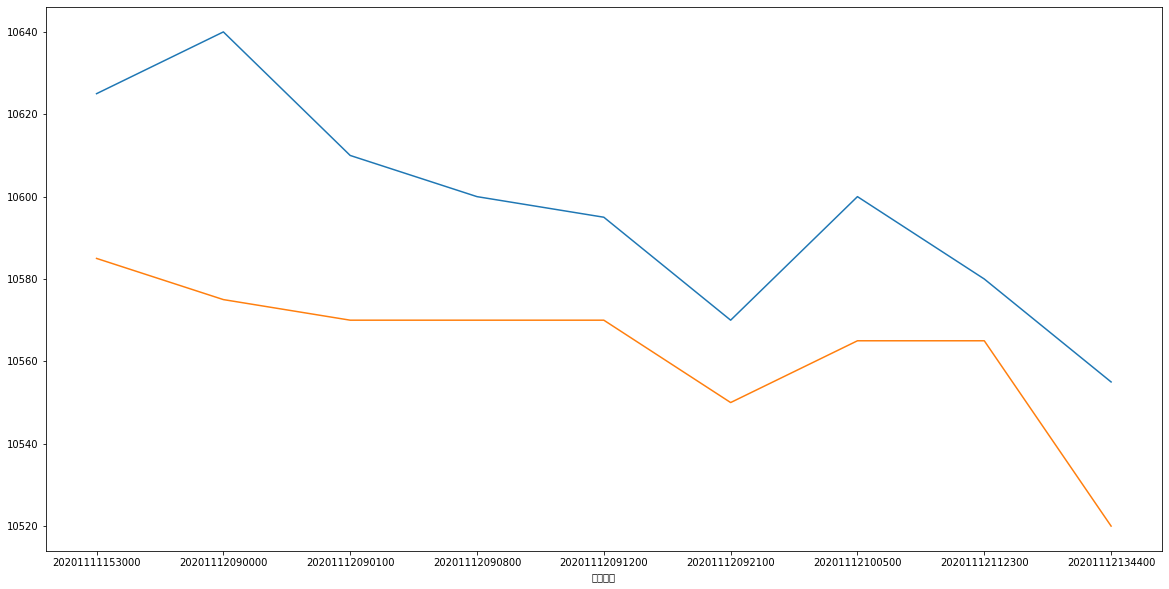

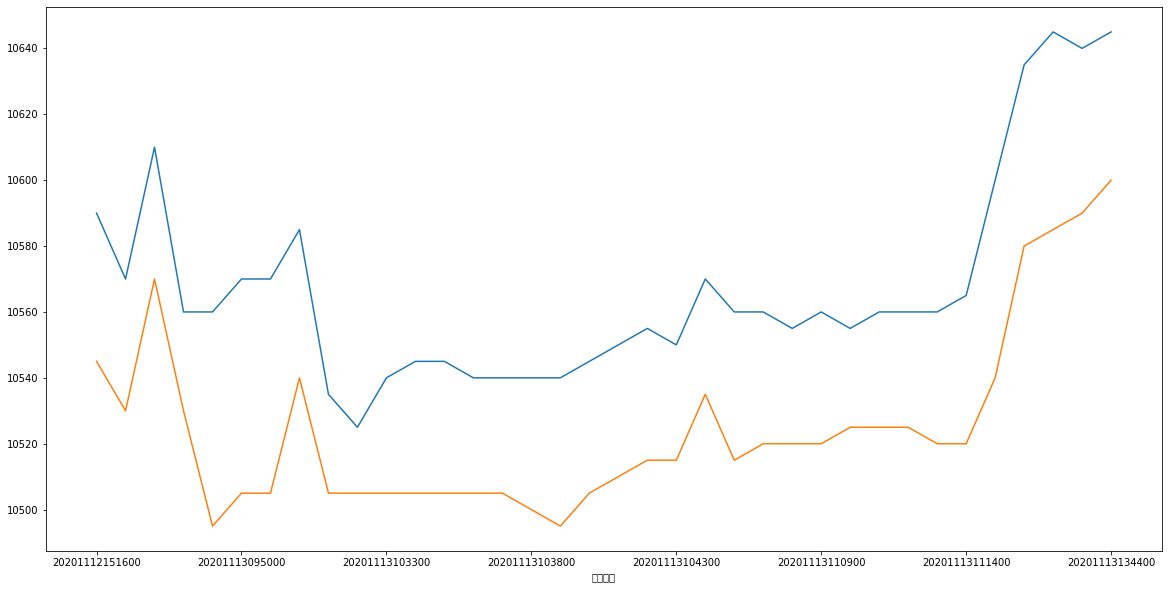

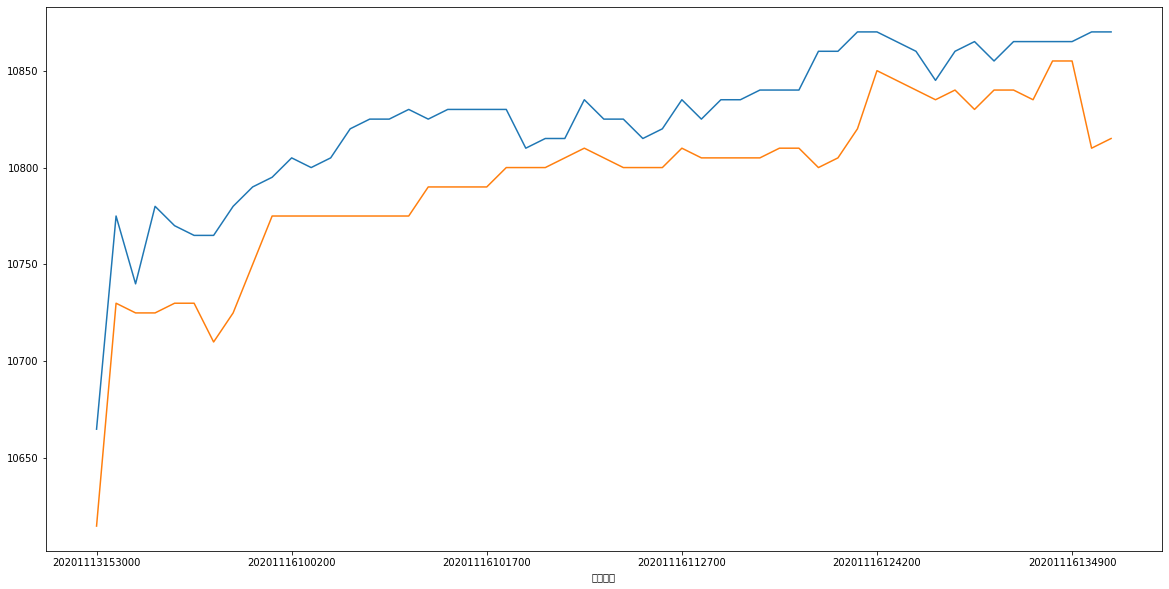

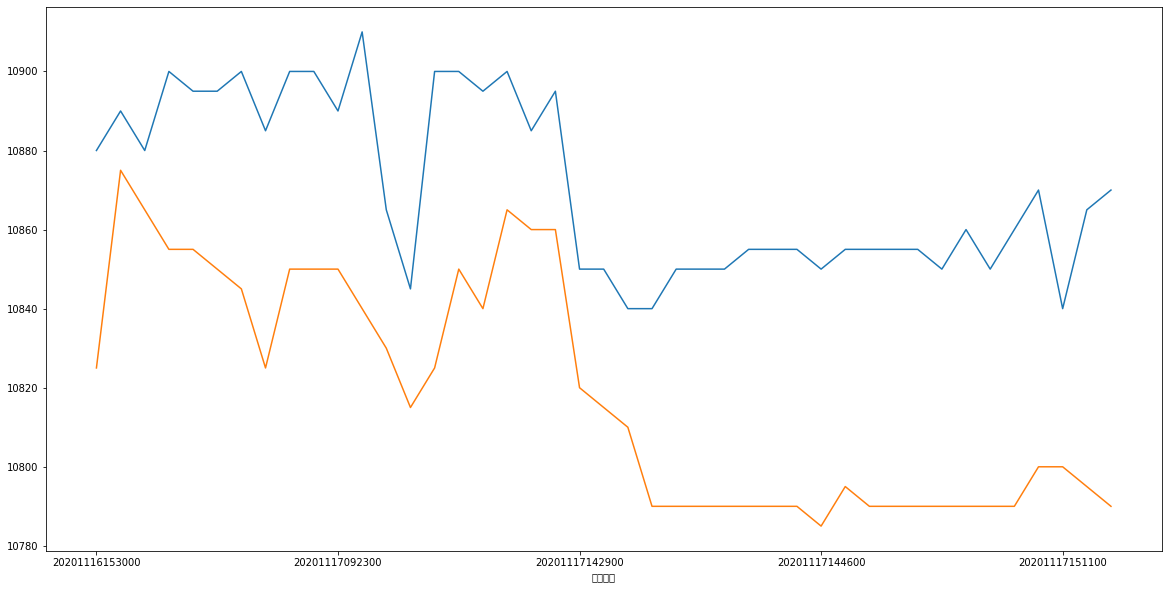

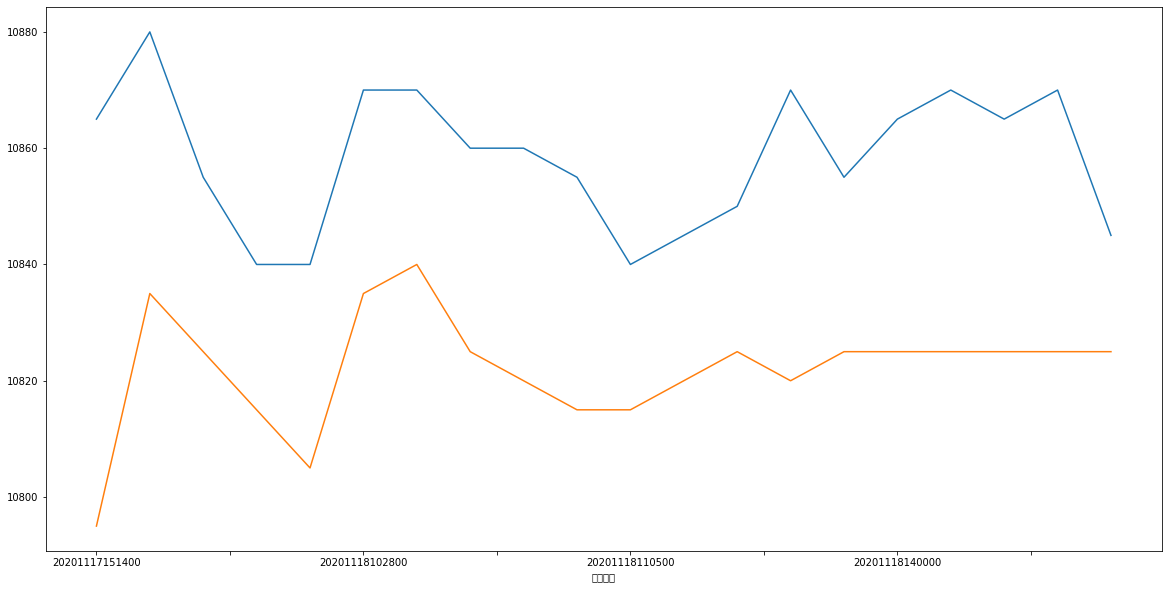

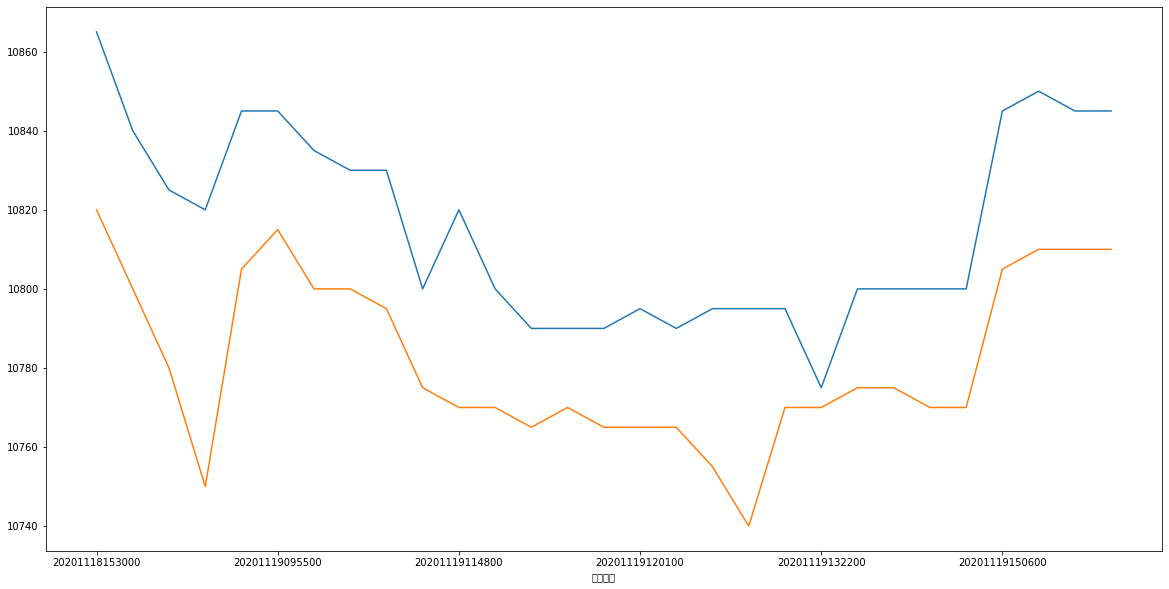

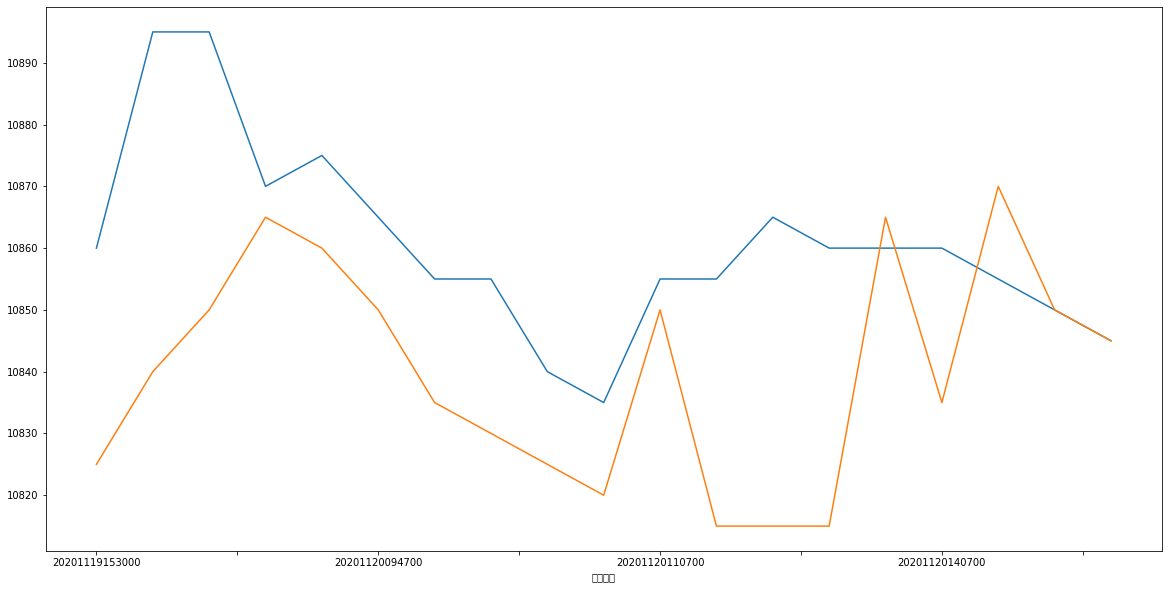

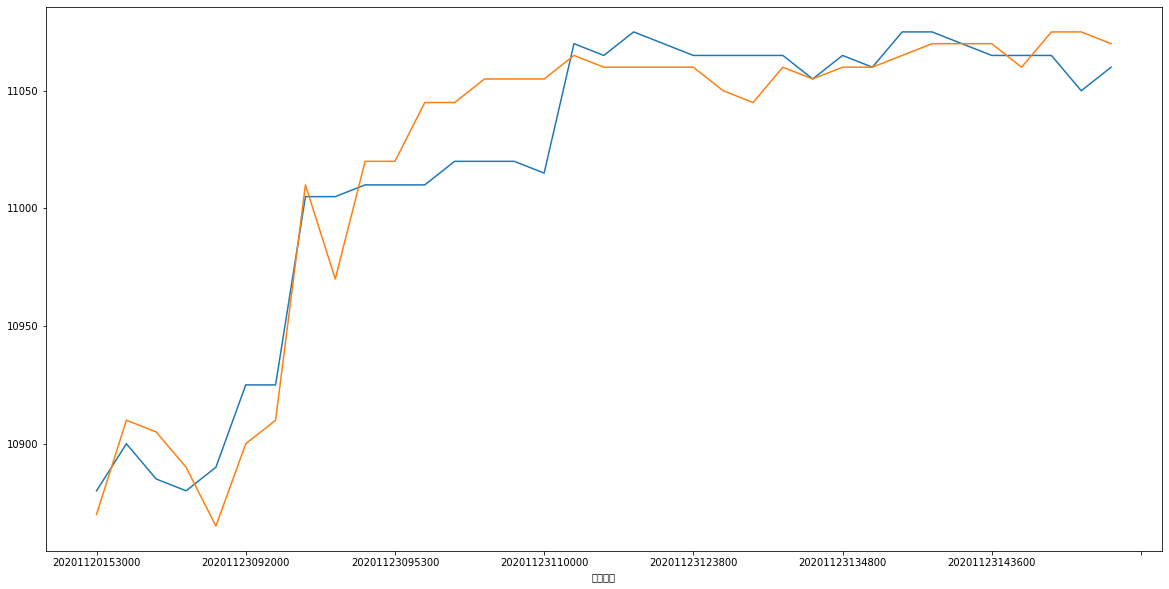

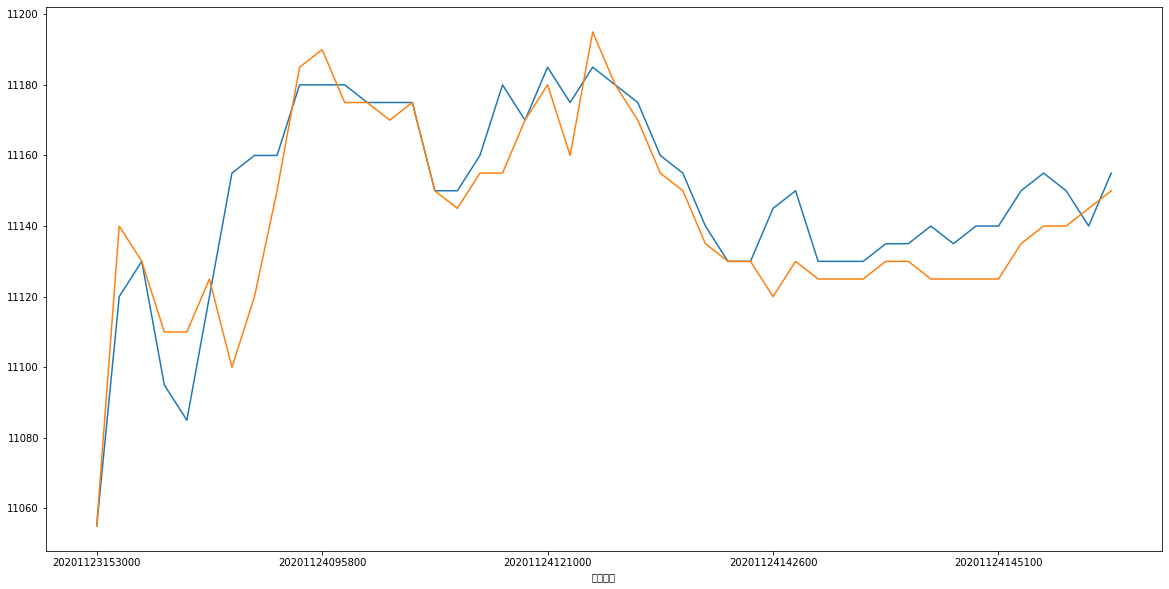

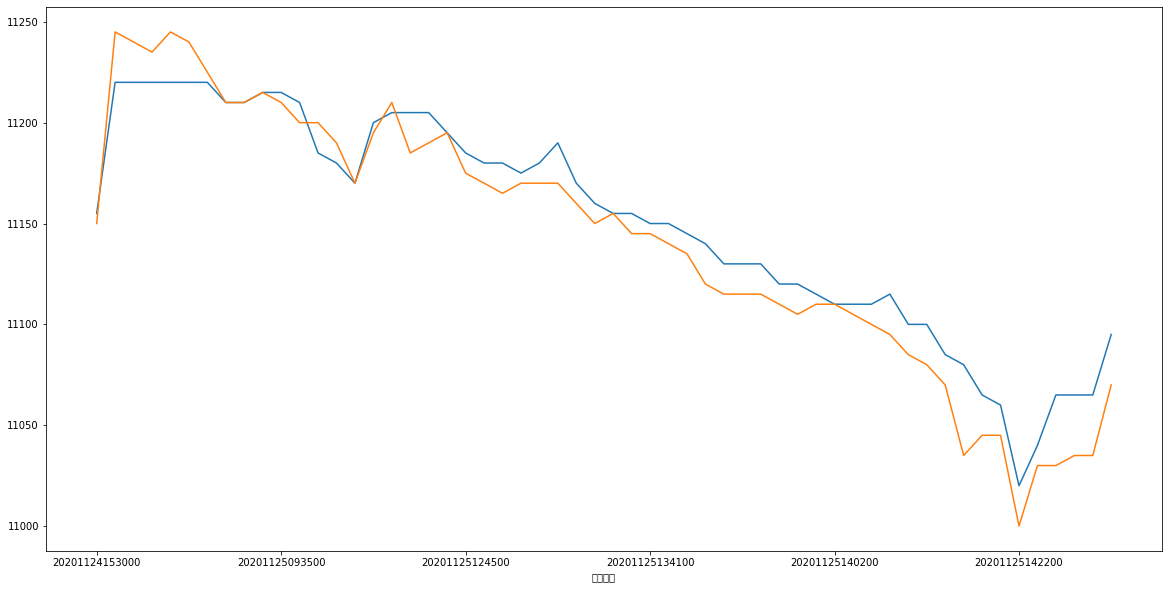

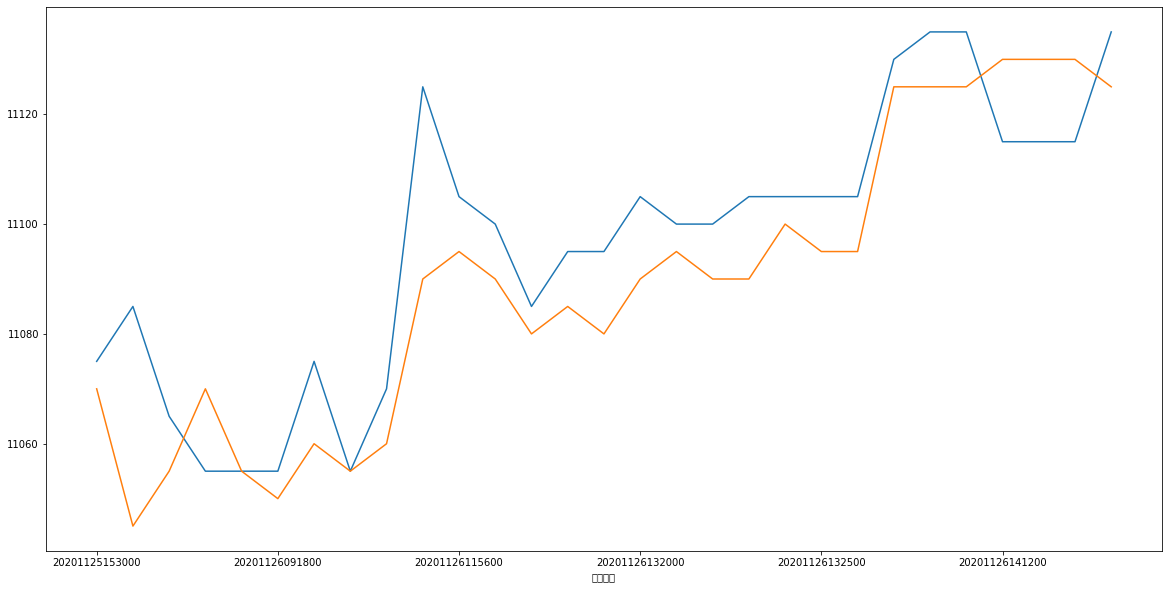

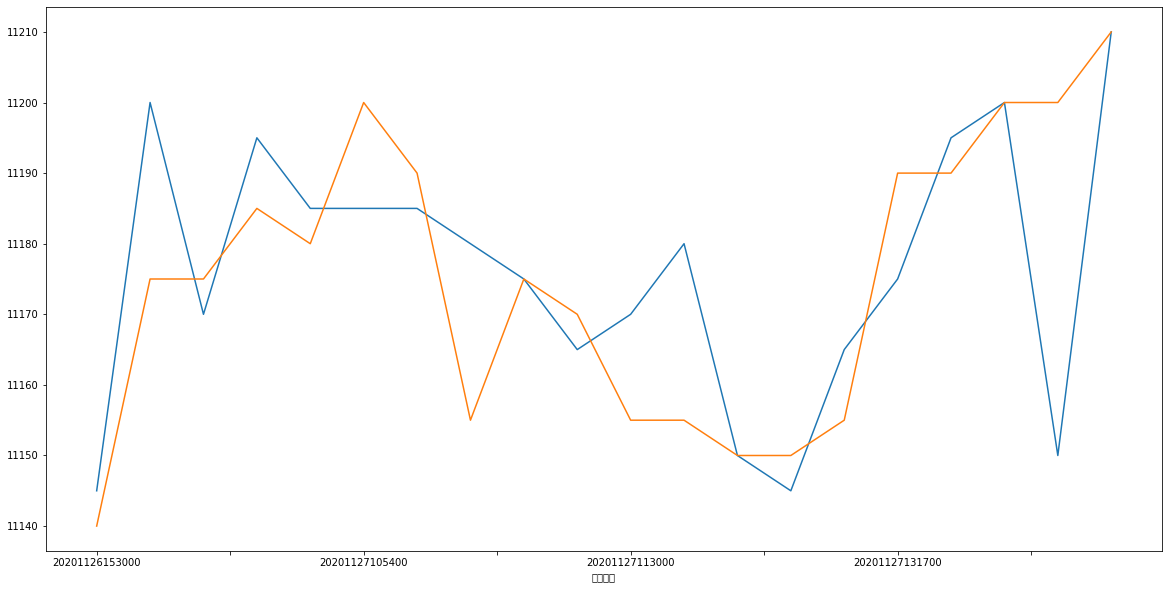

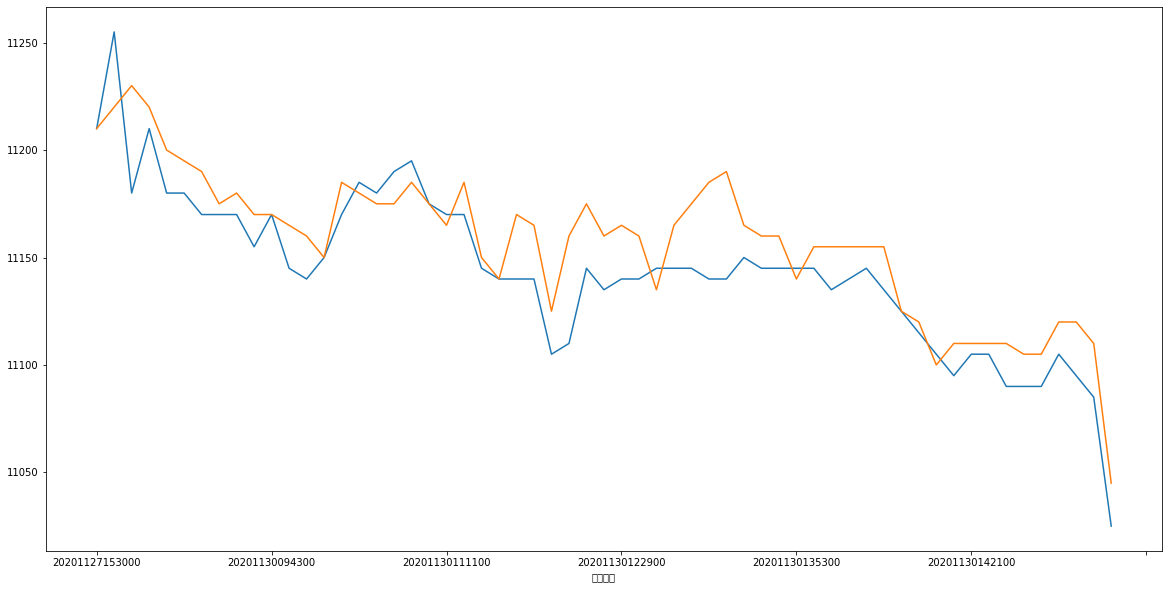

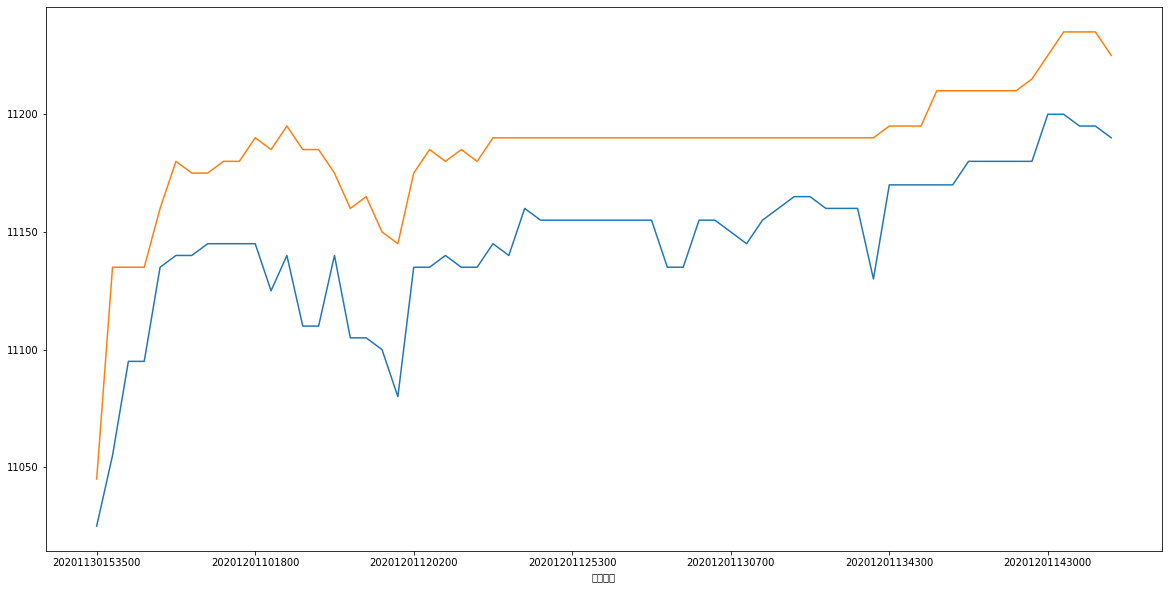

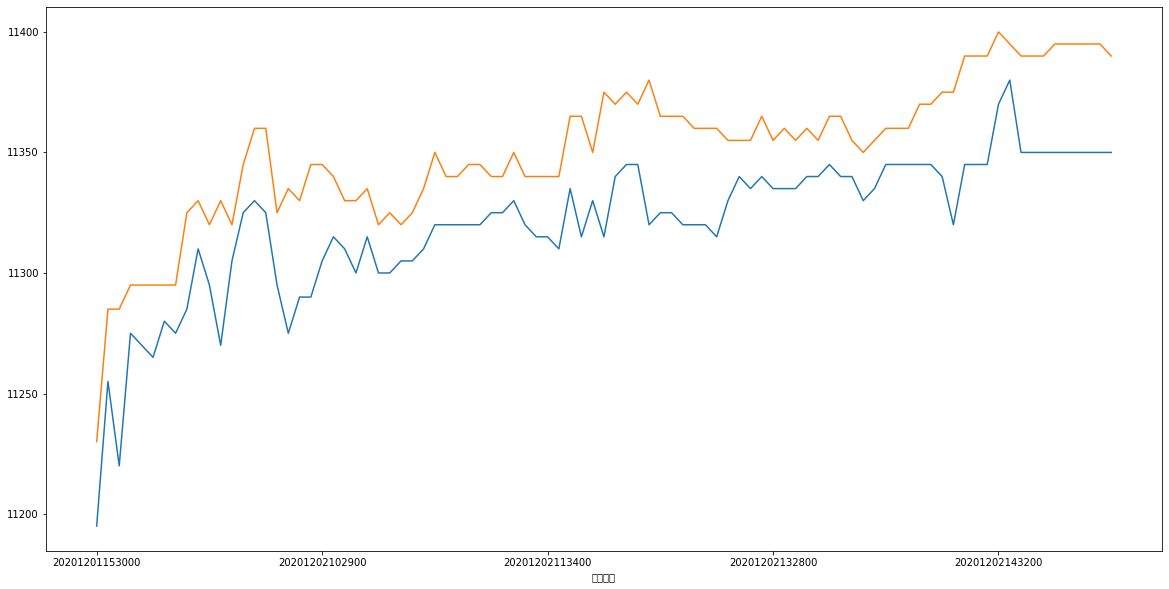

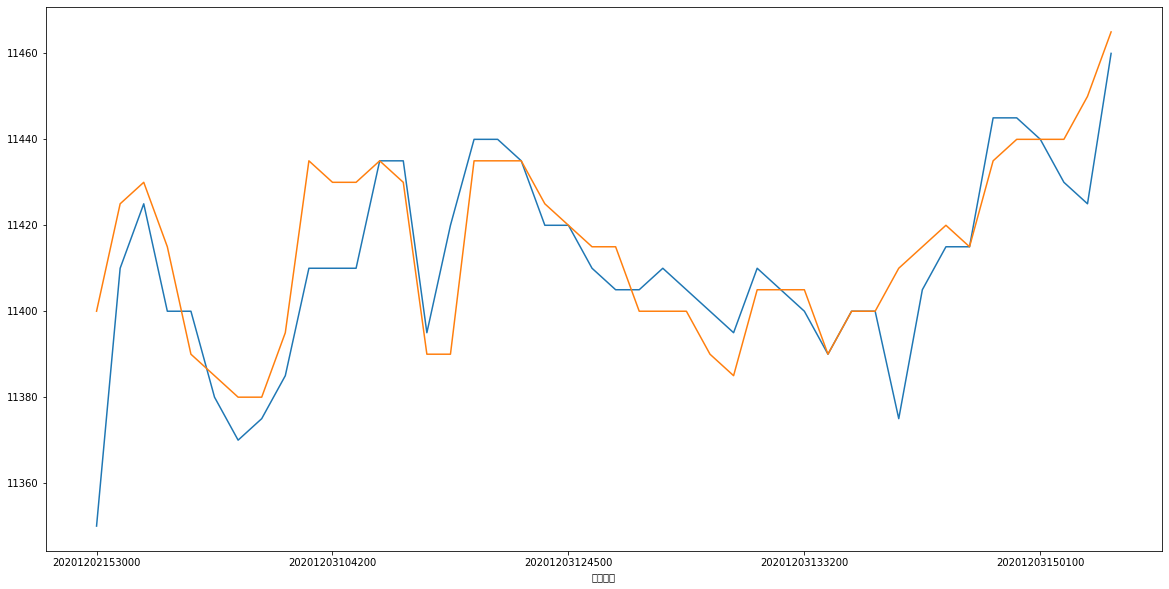

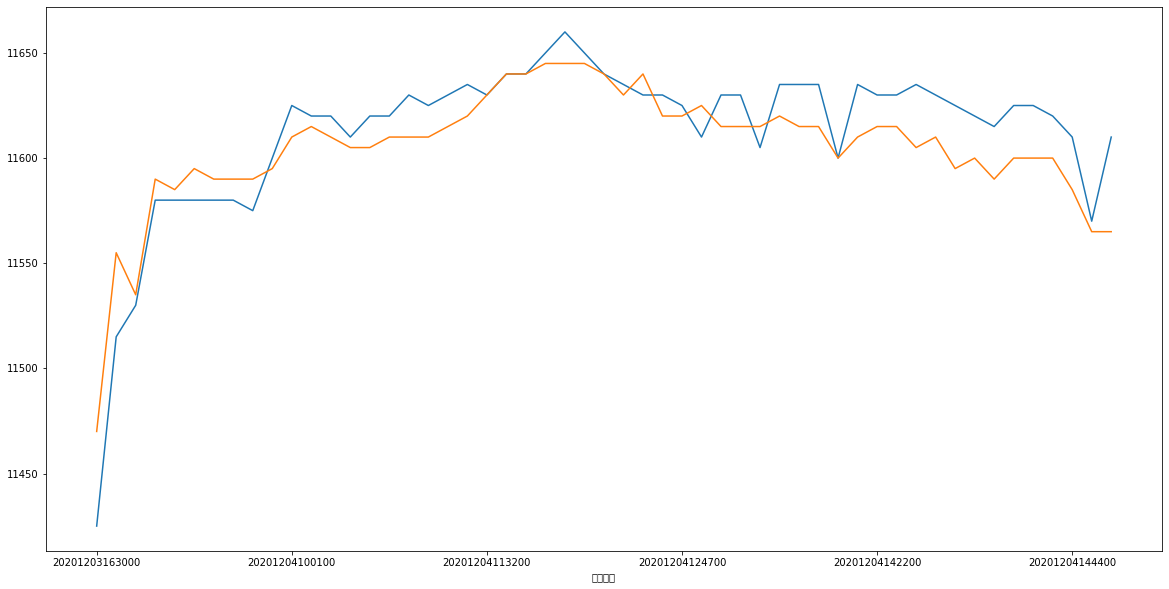

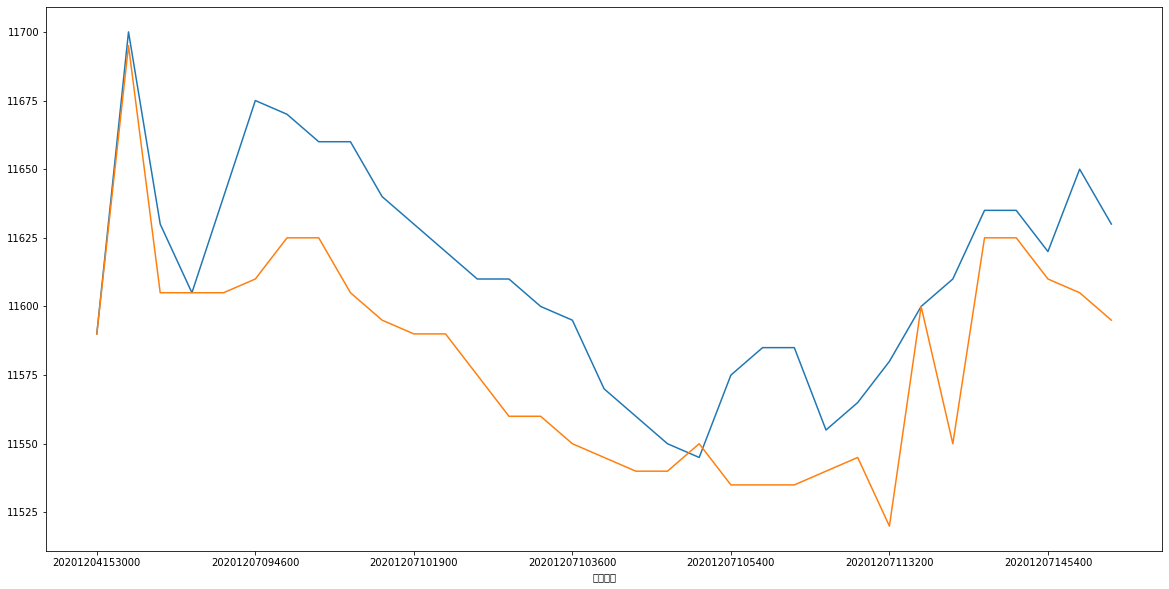

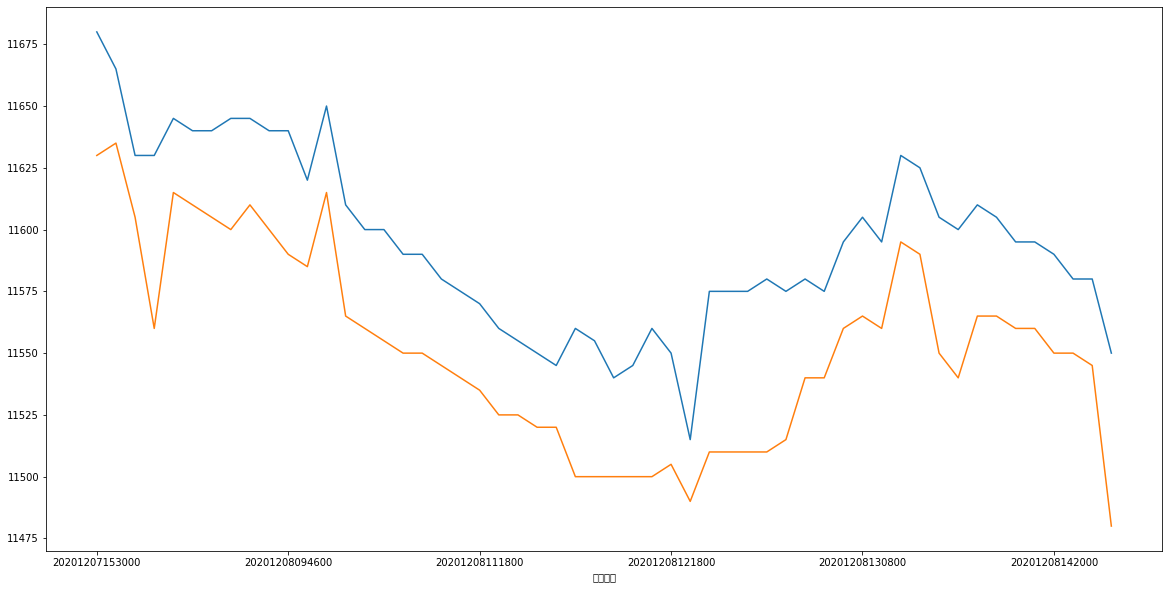

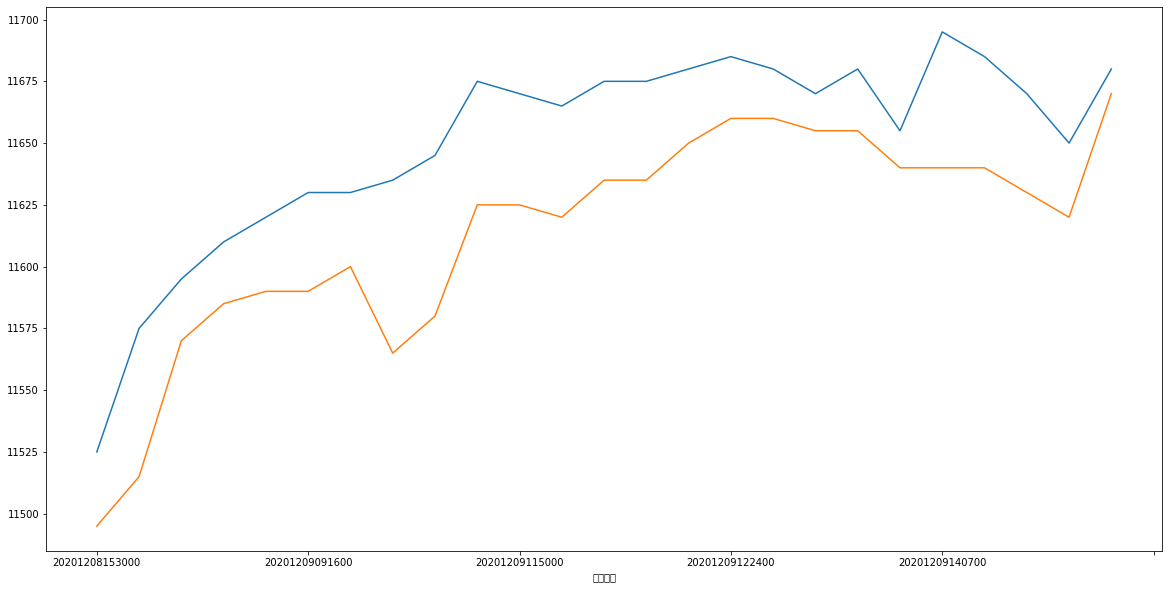

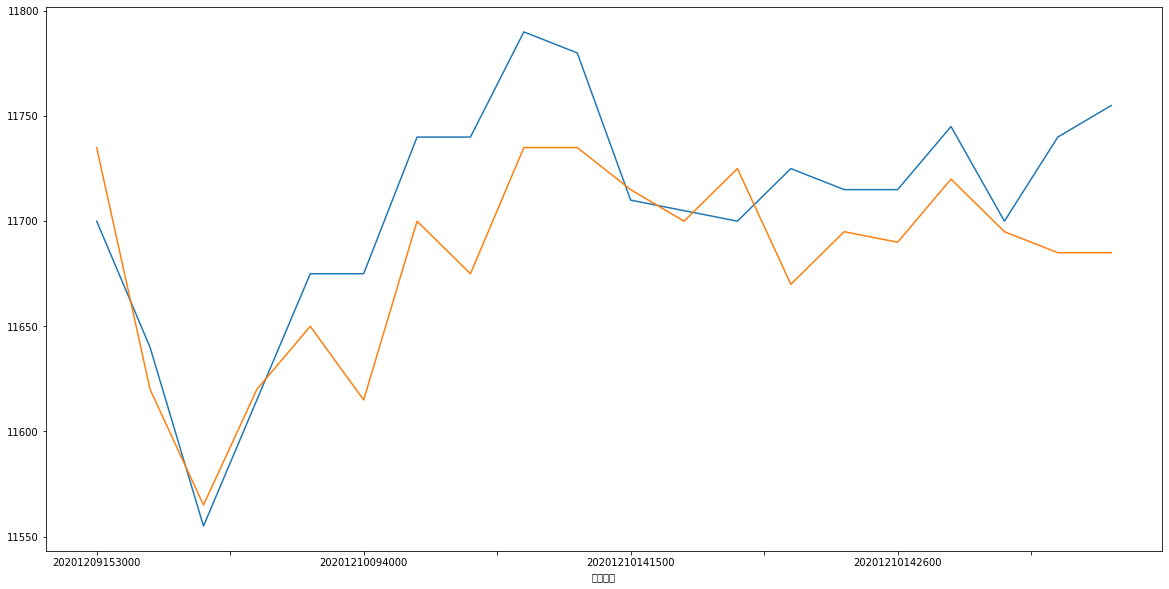

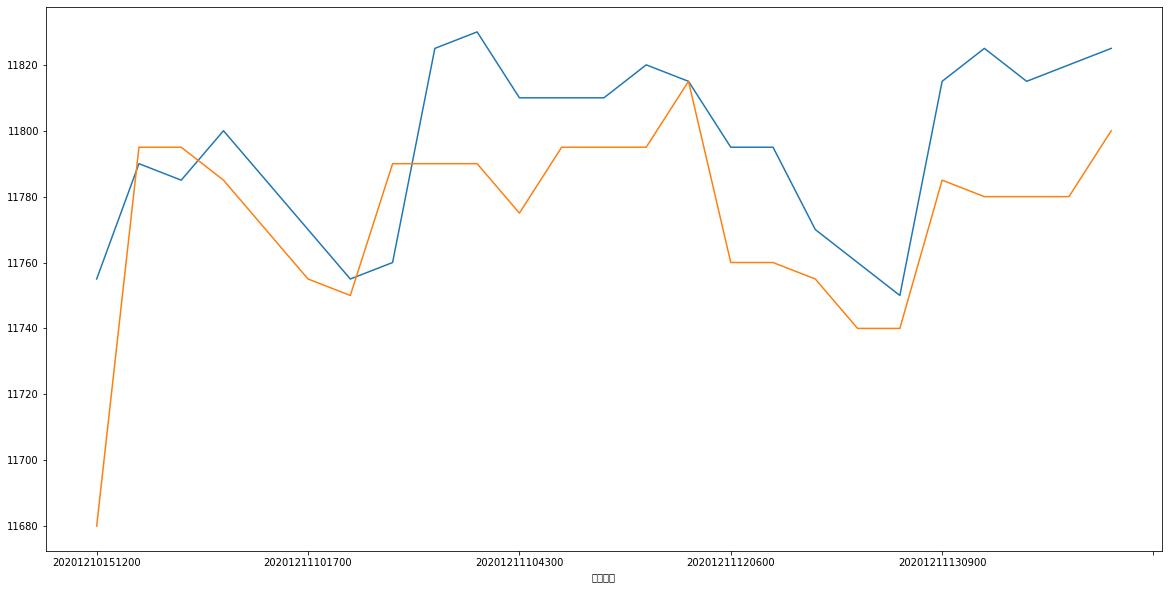

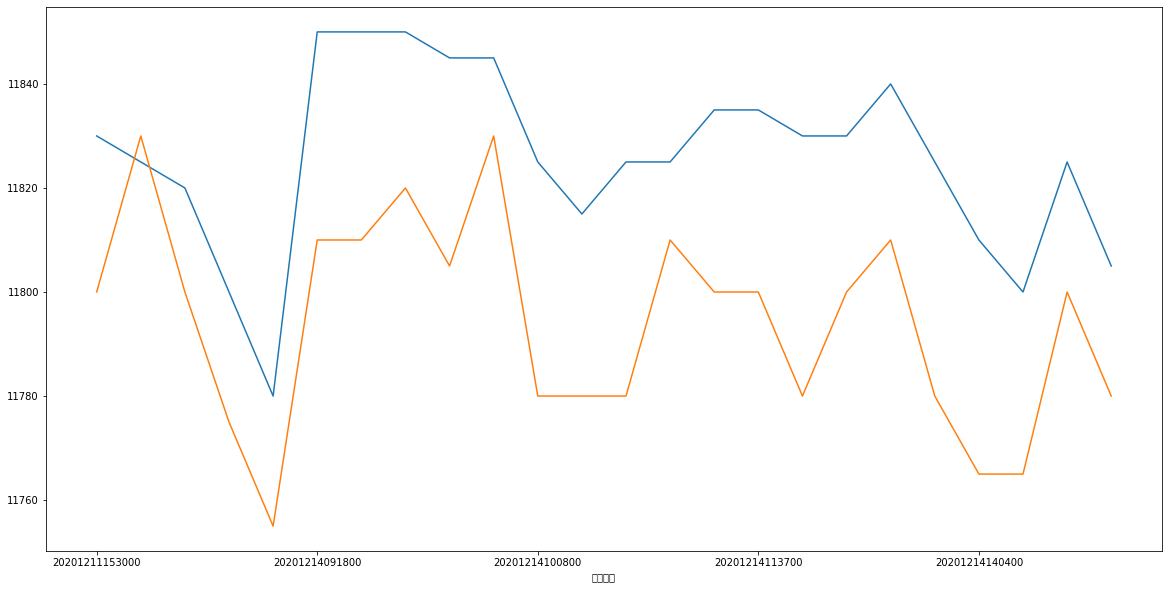

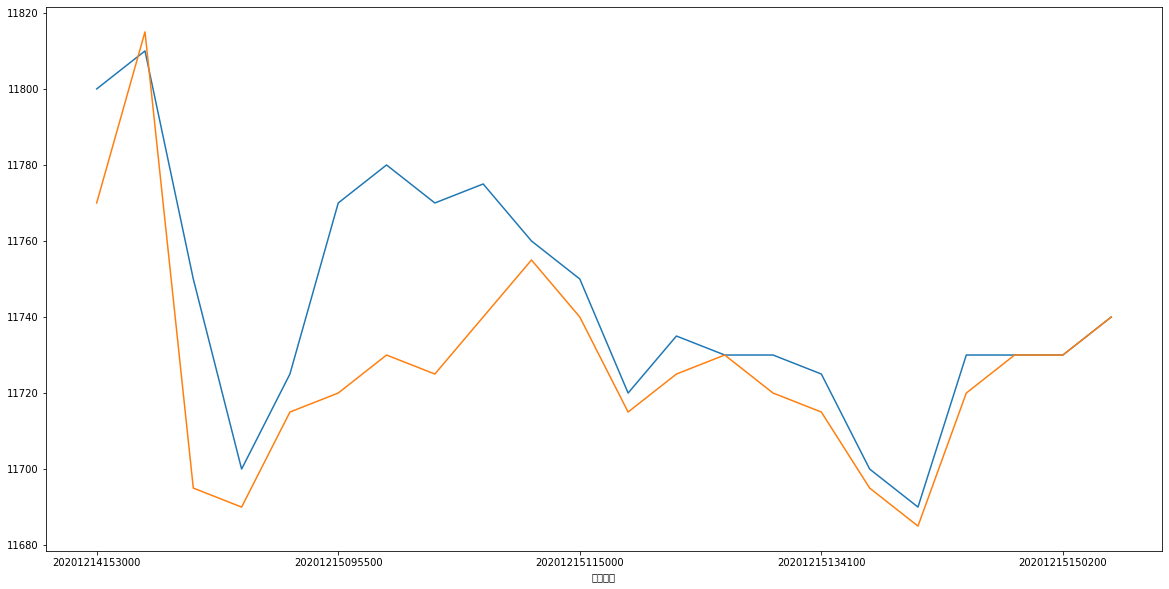

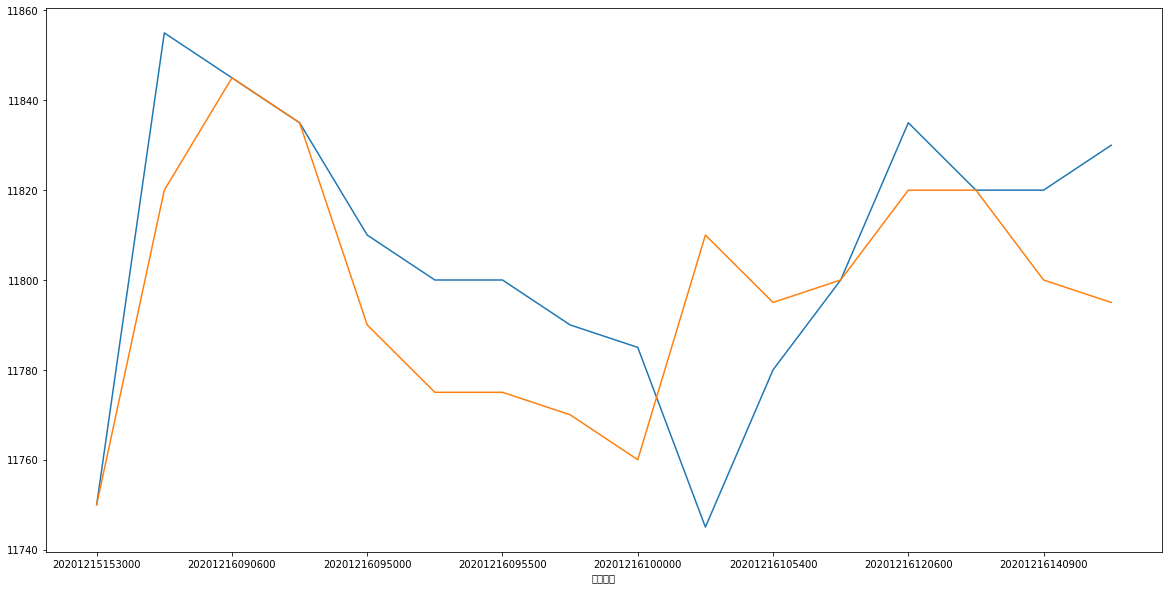

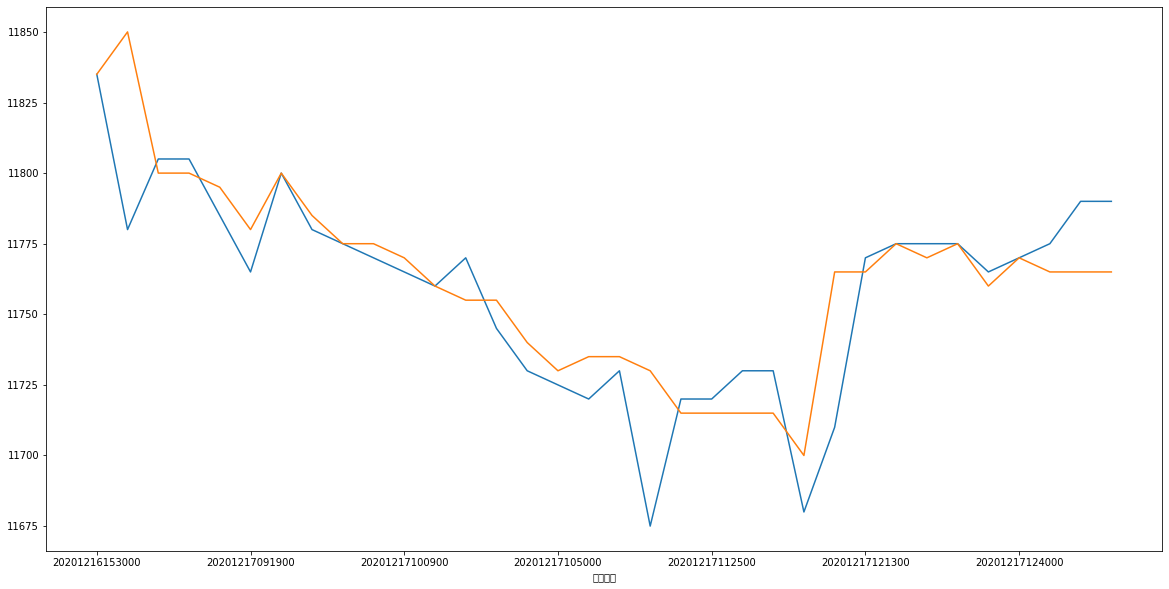

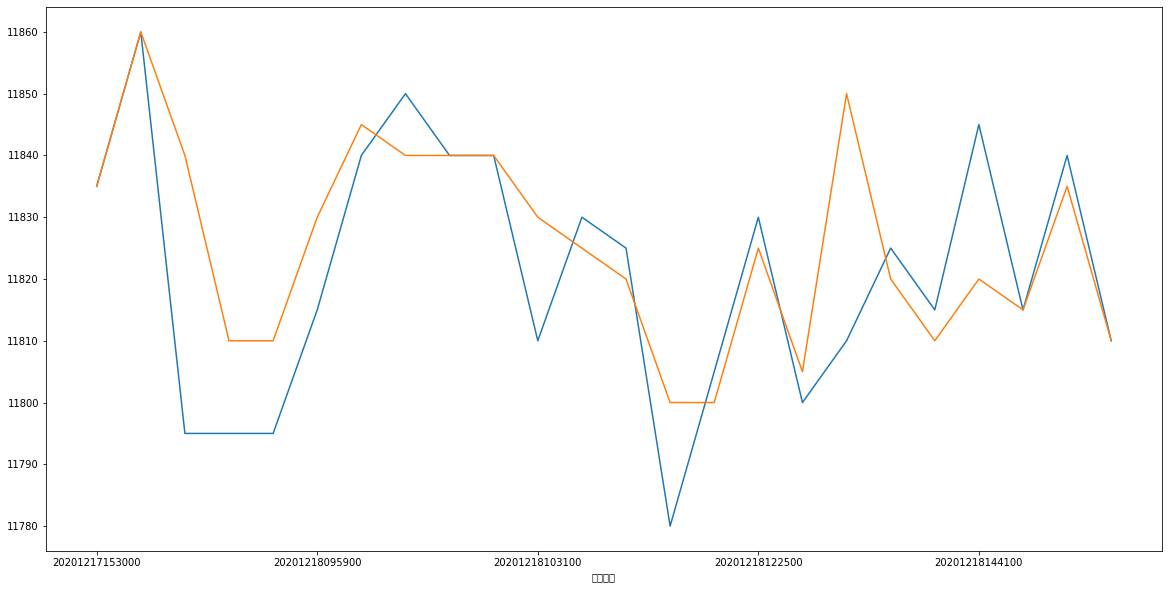

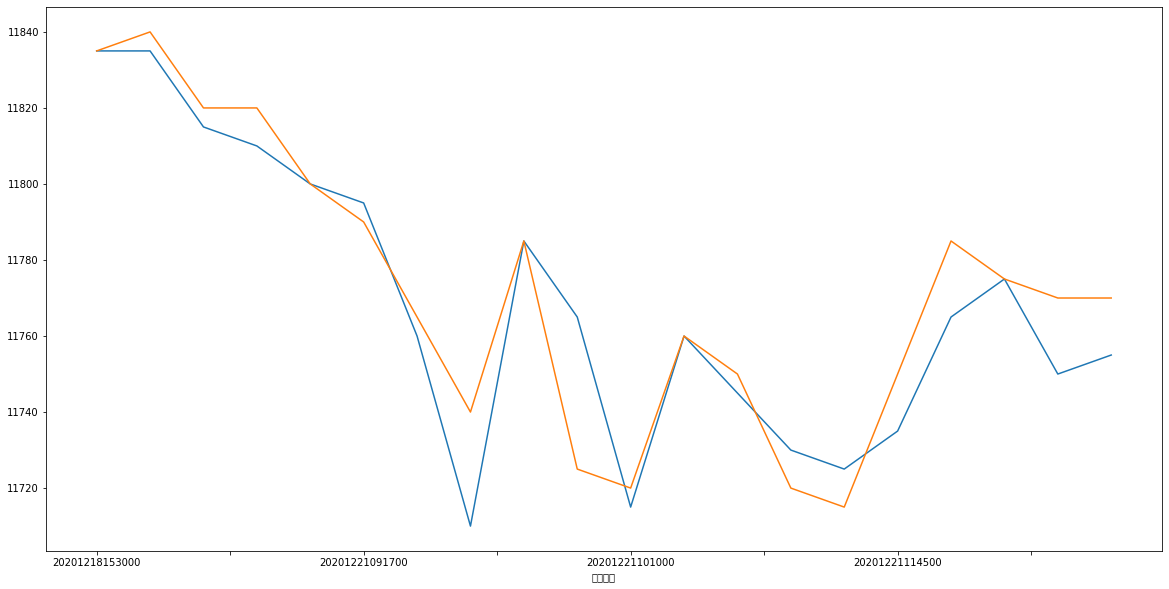

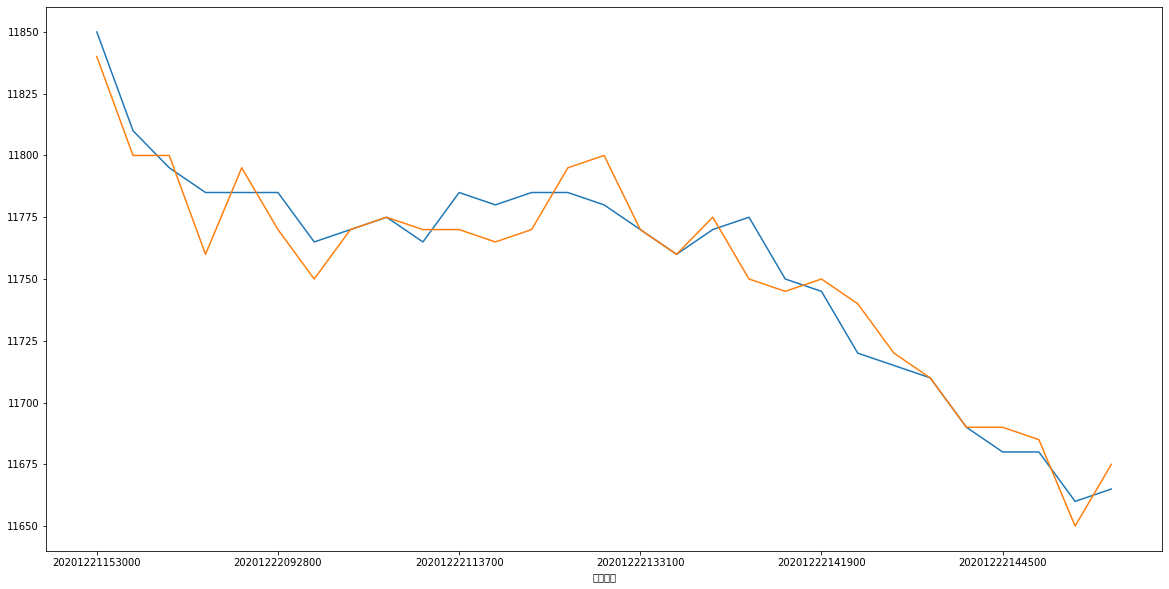

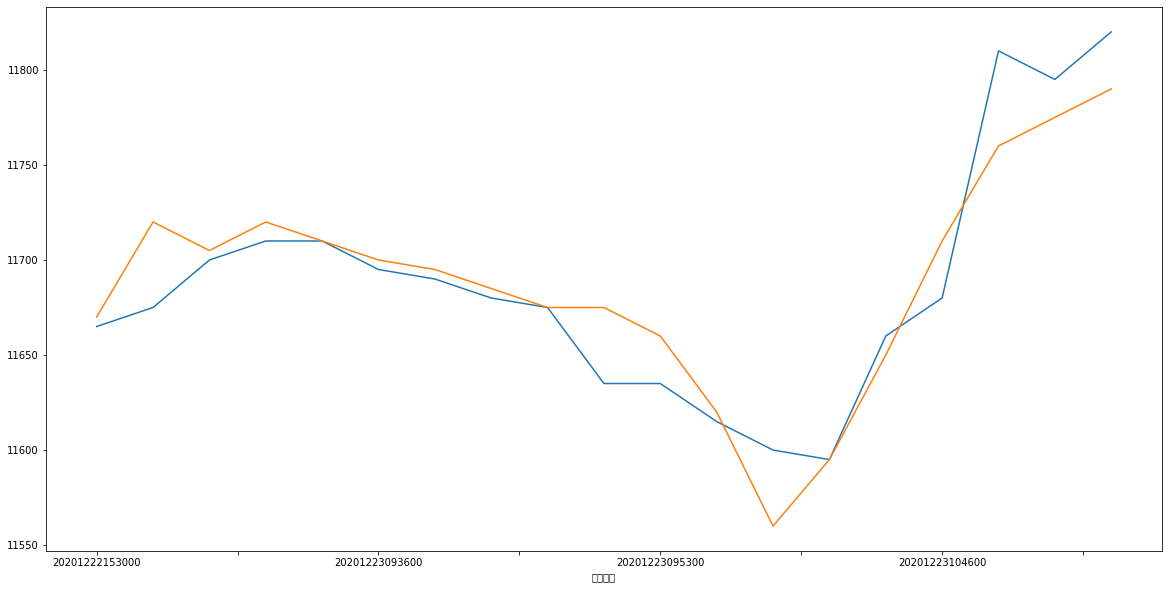

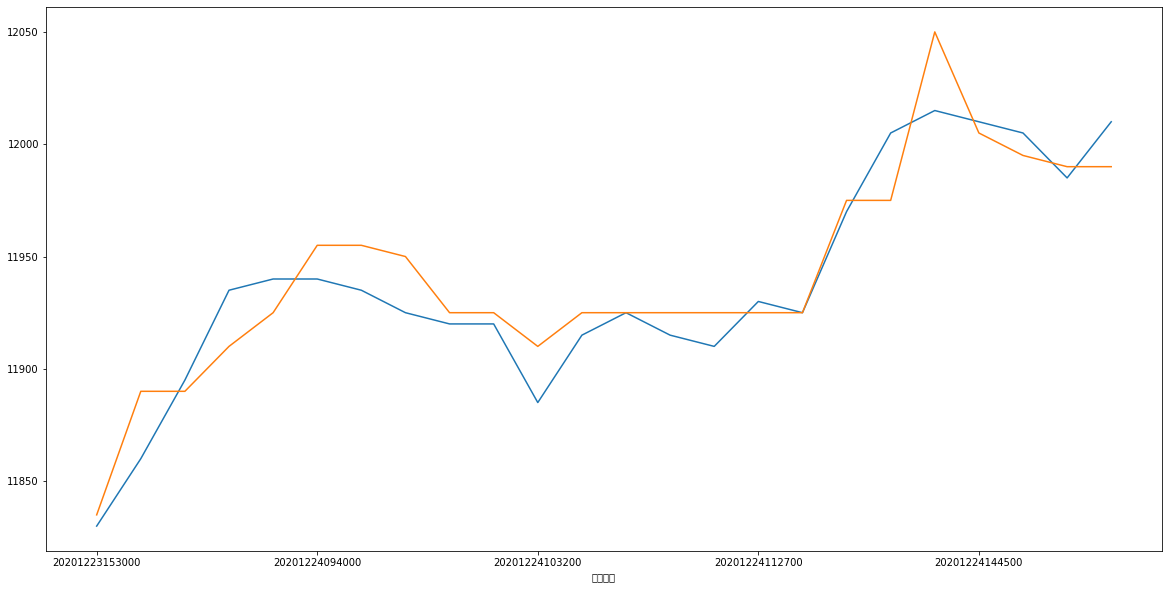

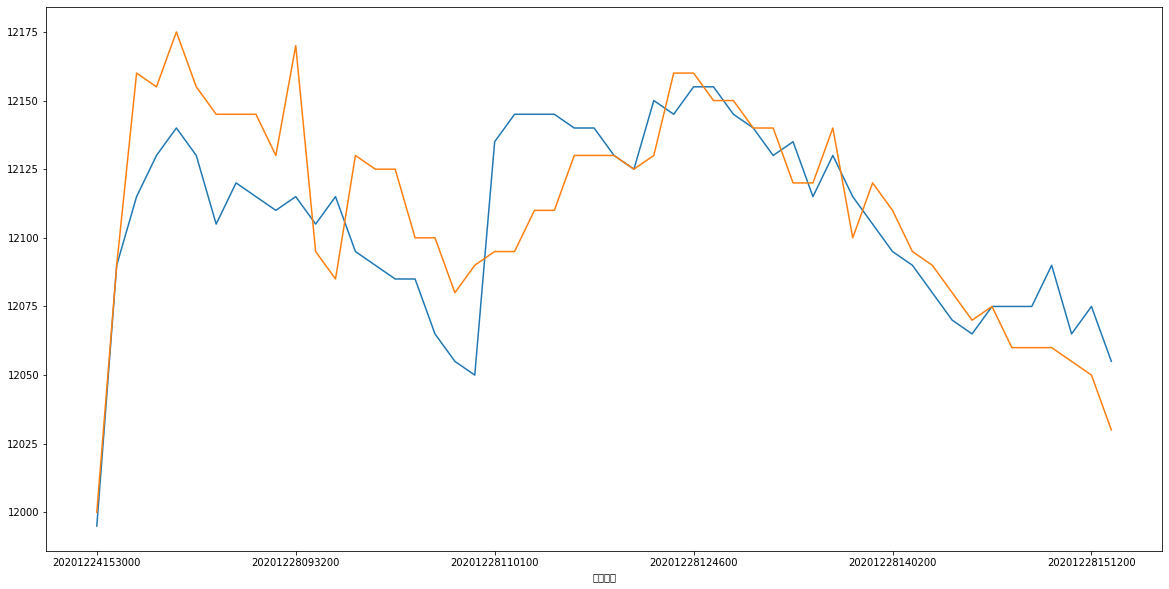

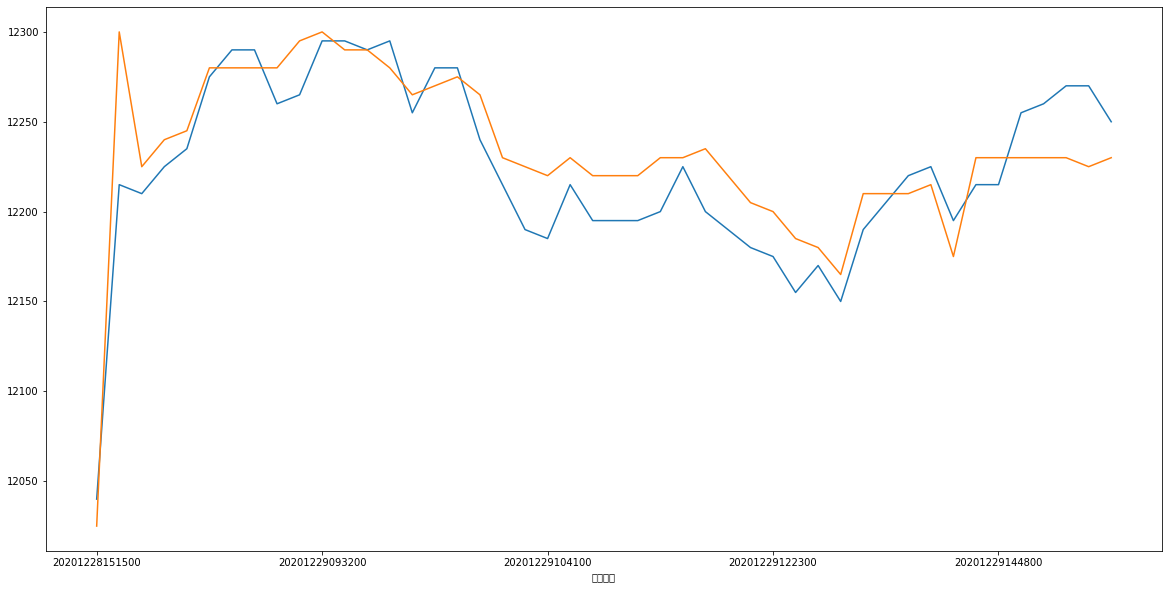

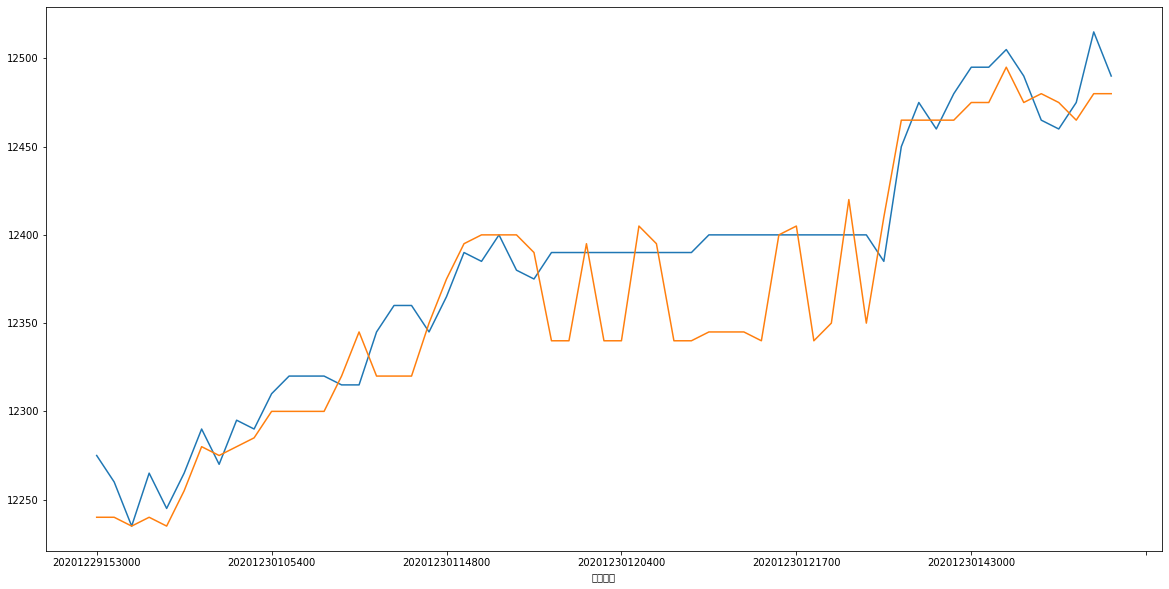

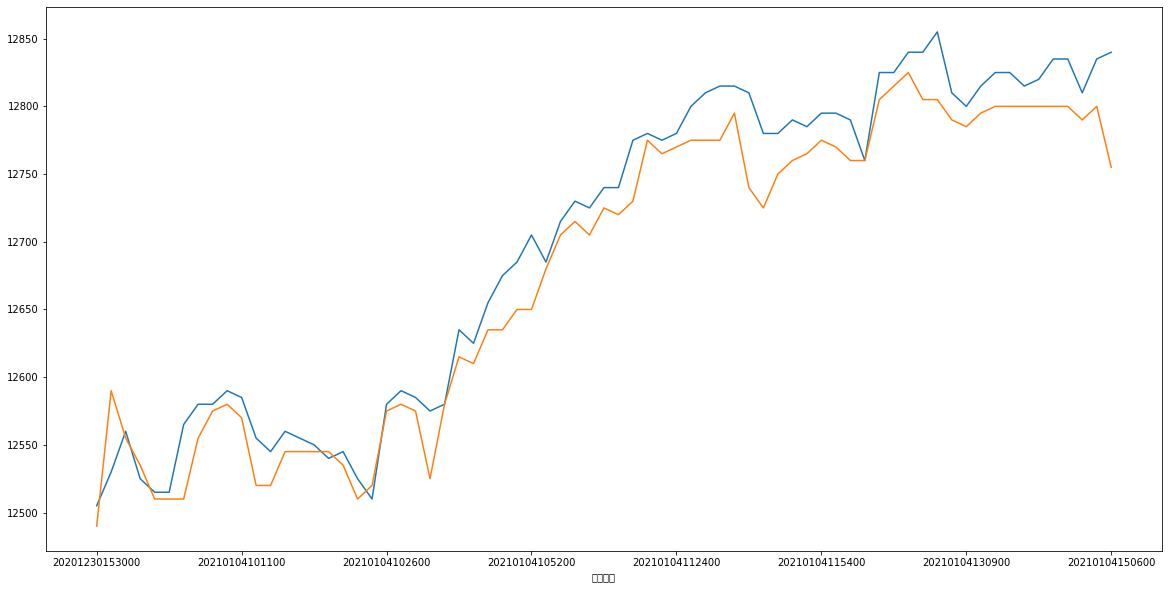

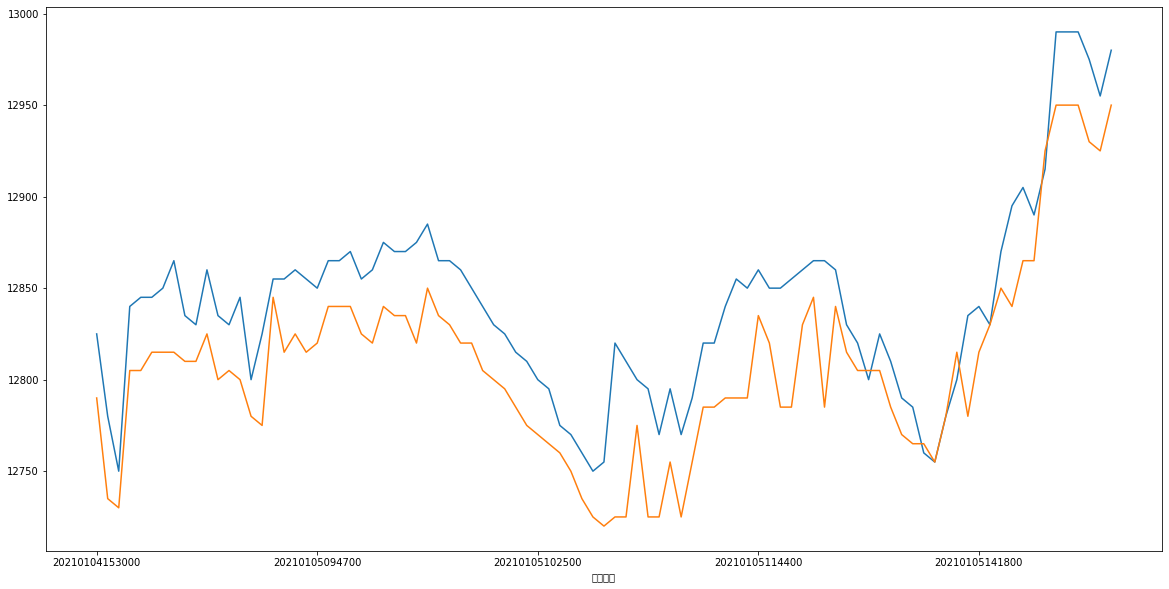

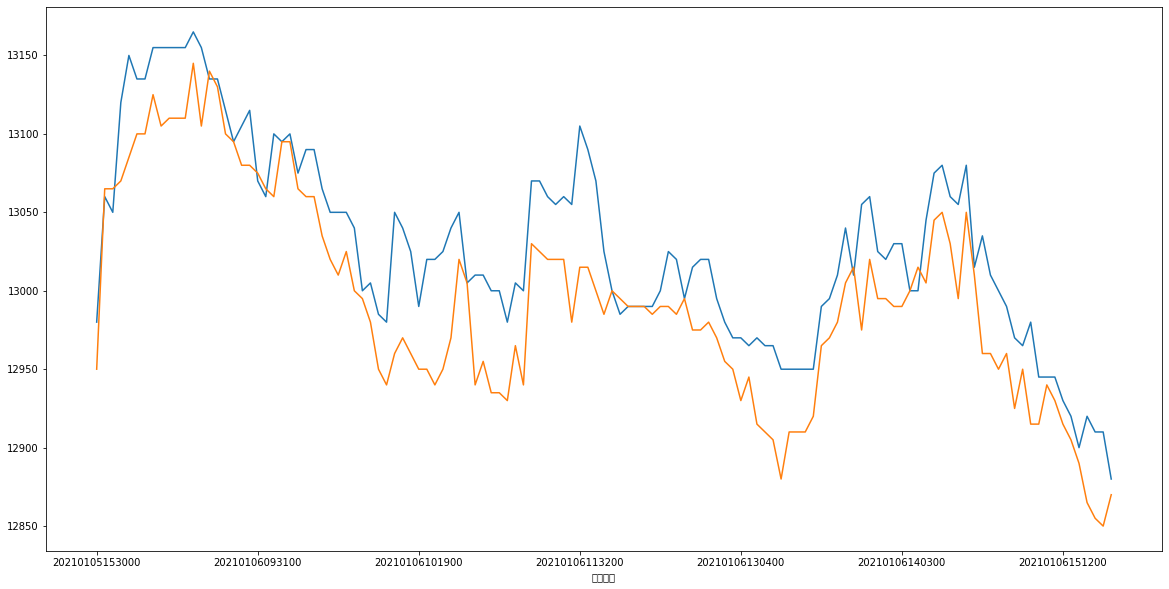

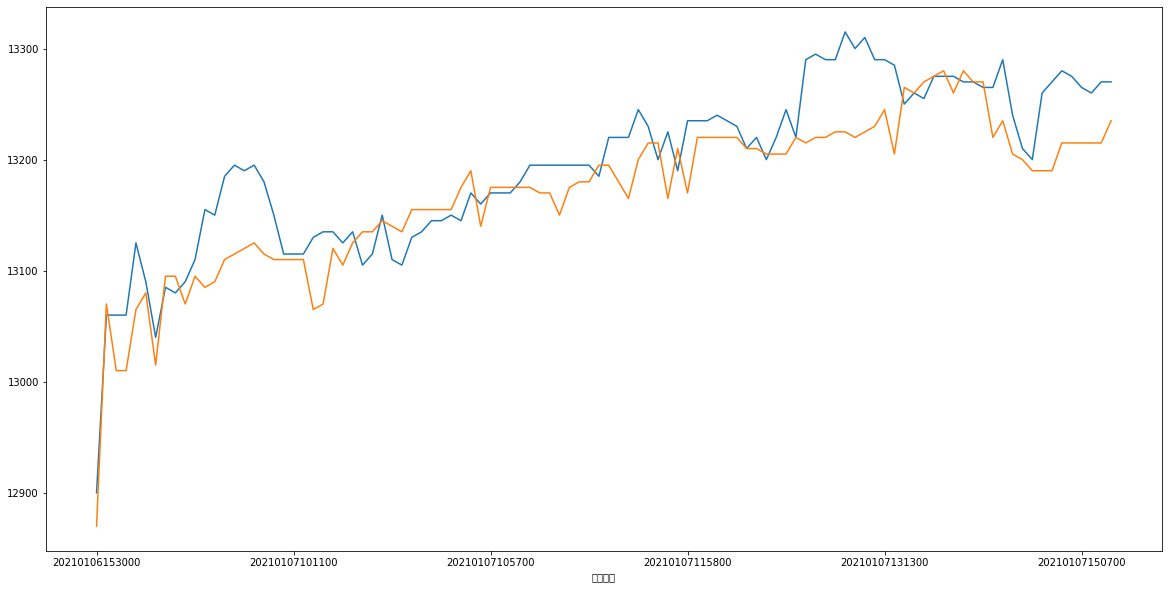

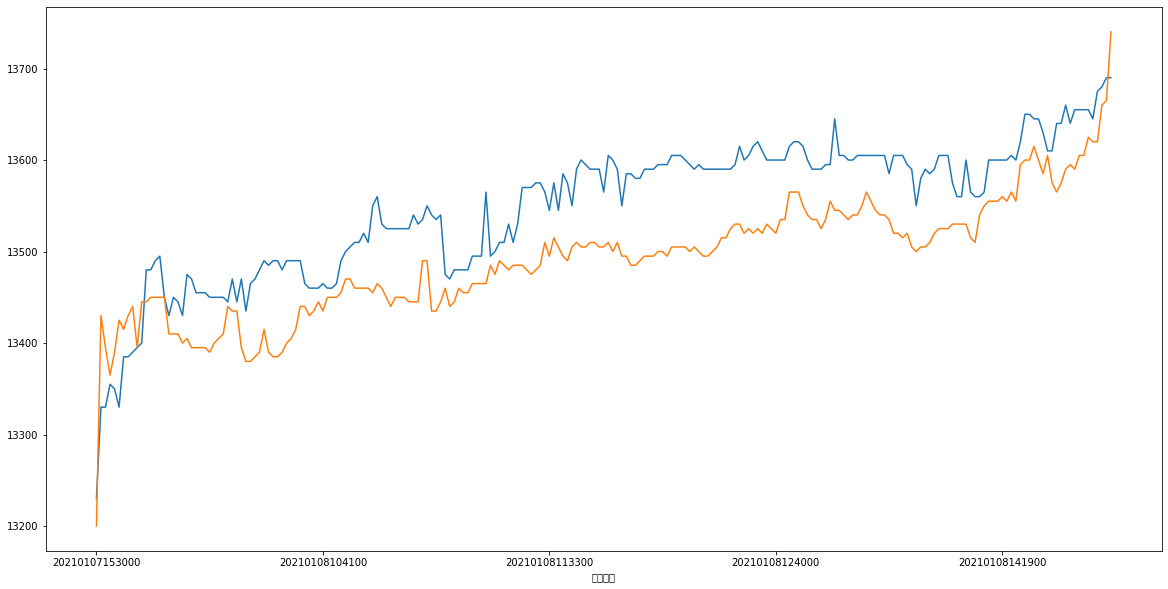

In [7]:
for date in calender:
    plt.rcParams["figure.figsize"] = (20, 10)
    # df[date]['spread'].plot()
    # df[date]['ma10_spread'].plot()
    # temp_high = df[date]['ma10_spread'] +30
    # temp_low = df[date]['ma10_spread']-30
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    df[date]['kodex_active'].plot()
    df[date]['tiger_active'].plot()
    # df[date]['kodex_active_cumret'].plot()
    # df[date]['tiger_active_cumret'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

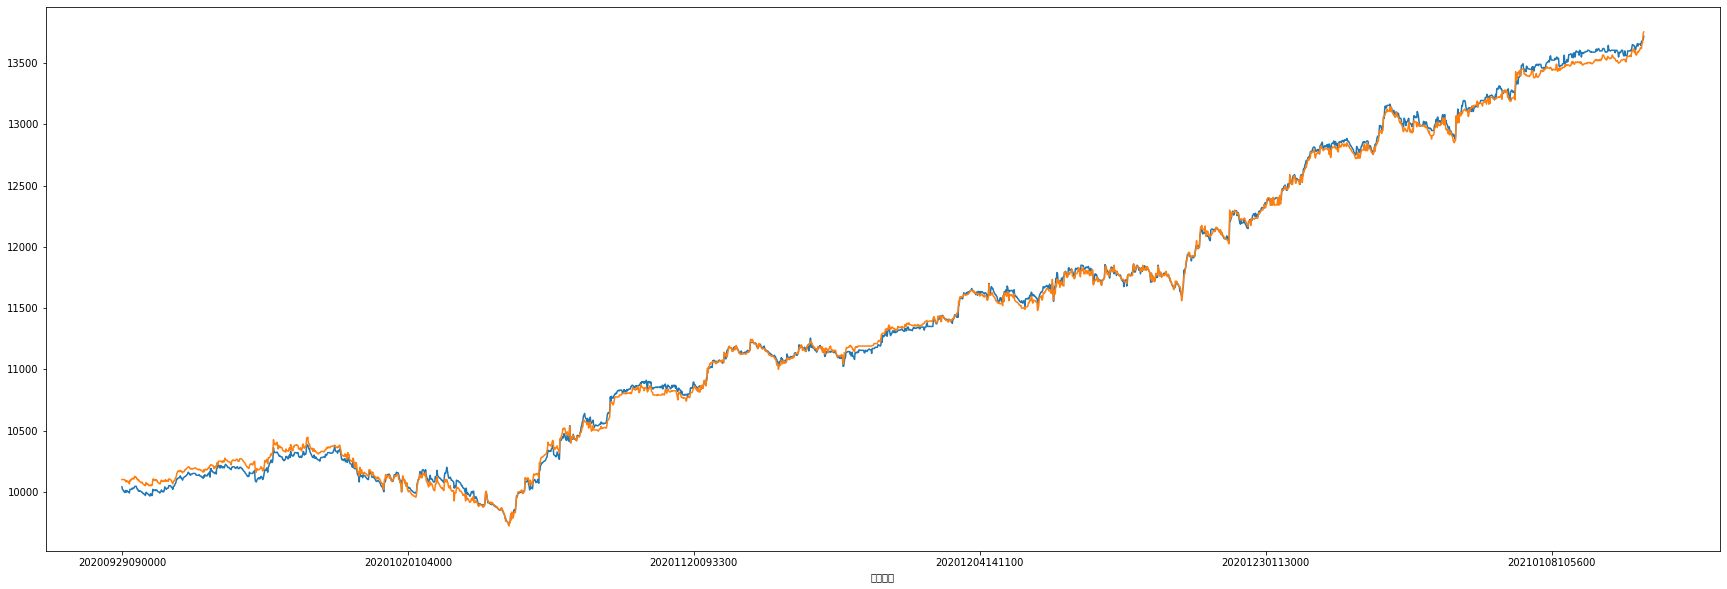

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
# temp['kodex_active_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['kodex_active'].plot()
temp['tiger_active'].plot()
# temp['ma30'].plot()

In [ ]:
for i in range(len(temp)):
    if temp['kodex_active'].iloc[i] < 0:
        temp['kodex_active'].iloc[i] = -temp['kodex_active'].iloc[i]